## Data Analysis with Kaggle Data Set

## Retrieve Dataset
## Data cleansing
## Data Processing
## Data Analysis Univariate
## Data Analysis Multivariate
## Hypothesis Test
## Feature Engineering
## Model
## Measure and Performence
## Conclusion and Recomnandations

# Data Analysis with Kaggle Data Set

### Project Goals
Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students

-How many applications must be made to select 25% women for each on average?

-What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection?

-What is the average number of university students who should participate in this program?

-What will be the average number of applications per week that we could have
How many weeks should we extend the application process to select 60 students per commune?

-If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time.

-What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

## Retrieve Dataset

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re as re
import seaborn as sns
import datetime as dt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving commune.xlsx to commune.xlsx
Saving data.ipynb to data.ipynb
Saving enroll.csv to enroll.csv
Saving industry.csv to industry.csv
Saving ord.csv to ord.csv
Saving quest.csv to quest.csv
Saving study_domain.csv to study_domain.csv
Saving technology.csv to technology.csv
Saving transaction.csv to transaction.csv


# Data cleansing


In [5]:
# reading files
commune=pd.read_excel(r"commune.xlsx")
enroll = pd.read_csv(r"enroll.csv")
quest = pd.read_csv(r"quest.csv")
industry = pd.read_csv(r"industry.csv")
ord = pd.read_csv(r"ord.csv")
study_domain = pd.read_csv(r"study_domain.csv")
transaction = pd.read_csv(r"transaction.csv")
technology = pd.read_csv(r"technology.csv")

In [6]:
#Extract each values of "Study_domain" and place them into a separate Columns before Merge
study_domain1 = pd.get_dummies(data=study_domain[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
study_domain2 = study_domain1.groupby("quest_id").sum()

In [7]:
#Extract each values of "Technology" and place them into a separate Columns before Merge
technology1 = pd.get_dummies(technology[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
technology2 = technology1.groupby("quest_id").sum()

In [8]:
#Extract each values of "industry" and place them into a separate Columns before Merge
industry1= pd.get_dummies(industry[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
industry2= industry1.groupby("quest_id").sum()

In [9]:
# Merge Tables by "quest_id"
result=pd.merge(left=quest, right=enroll[["user_id","percentage_completed",'quest_id']], how = 'left',on='quest_id')
result1=pd.merge(left=result, right=study_domain2, how = 'left',on='quest_id')
result2=pd.merge(left=result1, right=technology2, how = 'left',on='quest_id')
result3=pd.merge(left=result2, right=industry2, how = 'left',on='quest_id')

#Transform "Commune_Id" Values in lower Character before Merge
commune["Commune_Id"] = commune["Commune_Id"].str.lower()

#commune['id'] = commune["Commune_Id"].apply(lambda x : x[2:])
#commune['commune'] = (commune["Commune_Id"].apply(lambda x : x[0:2].lower())+ commune["Commune_Id"].apply(lambda x : x[2:]))

#Rename "Commune_Id" in "commune"
commune.rename(columns = {"Commune_Id": "commune"}, inplace = True)

#commune = commune.iloc[:, :-1]
#commune.drop(columns= ["lowers", "id"], inplace =True)

# Merge Result3 and Commune
result4=pd.merge(left=result3, right=commune[["Commune_FR","Departement", "commune"]], how = 'left',on='commune')

# Choose the 10 first Character before convert in Date
result4["created_at"] = result4["created_at"].str[:10]

#val = result4.isna().sum()
#val[val>0]

#Merge File :"Result4" and File:"transaction" by "user_id"
resulta = pd.merge(left=result4, right=transaction[['user_id','transaction_id']], how = 'left',on='user_id')

#Merge "Ord" and "Resulta" by "quest_id"
result5 = pd.merge(left=resulta, right=ord[['status',"amount_dollars",'quest_id']], how = 'left',on='quest_id')

#See the result
result5.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,user_id,percentage_completed,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other,Commune_FR,Departement,transaction_id,status,amount_dollars
0,0,male,25/08/1998,ht0111,2021-02-14,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,39726355.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port-au-Prince,West,NaN,NaN,NaN
1,1,female,29/09/1996,ht0111,2021-02-16,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Port-au-Prince,West,NaN,NaN,NaN
2,2,male,17/05/1996,ht0111,2021-02-16,2021-02-16T16:56:30.579563Z,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,40117659.0,0.325581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Port-au-Prince,West,4.613707e+09,NaN,NaN
3,3,male,24/11/1996,ht0111,2021-02-16,2021-02-16T16:57:55.754582Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Port-au-Prince,West,NaN,NaN,NaN
4,4,male,20/07/1997,ht0111,2021-02-16,2021-02-16T17:05:40.907982Z,ht01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Port-au-Prince,West,NaN,NaN,NaN


In [10]:
#Format in Date 
result5["dob"].replace({"3 aout 1977": "3/08/1977"}, inplace=True)
result5["dob"] = pd.to_datetime(result5["dob"])

#Convert "created_at" in format date
result5["created_at"] = pd.to_datetime(result5["created_at"])

#Create a Columns "age"
result5["age"] = ((result5["created_at"]-result5["dob"])//365)
#result5["dob"] = pd.to_datetime(result5["dob"])


#Choose the two first character in Age
result5["age"] = result5["age"].apply(lambda x: str(x)[:2])

# See the Result
result5.head(4) 

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,user_id,percentage_completed,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other,Commune_FR,Departement,transaction_id,status,amount_dollars,age
0,0,male,1998-08-25,ht0111,2021-02-14,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,39726355.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port-au-Prince,West,NaN,NaN,NaN,22
1,1,female,1996-09-29,ht0111,2021-02-16,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Port-au-Prince,West,NaN,NaN,NaN,24
2,2,male,1996-05-17,ht0111,2021-02-16,2021-02-16T16:56:30.579563Z,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,40117659.0,0.325581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Port-au-Prince,West,4.613707e+09,NaN,NaN,24
3,3,male,1996-11-24,ht0111,2021-02-16,2021-02-16T16:57:55.754582Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Port-au-Prince,West,NaN,NaN,NaN,24


In [11]:
#see all aff the columns
result5.columns

Index(['Unnamed: 0', 'gender', 'dob', 'commune', 'created_at', 'modified_at',
       'department', 'education_level', 'university', 'study_domain',
       'current_employed', 'formal_sector_job', 'have_computer_home',
       'internet_at_home', 'hear_AA_1', 'after_AA', 'quest_id', 'user_id',
       'percentage_completed', 'Accounting', 'Computer Science', 'Economics',
       'Electrical Engineering', 'Law', 'Management', 'Medicine', 'Statistics',
       'other_x', 'Bash', 'Excel', 'Git', 'Java', 'JavaScript', 'PHP',
       'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA', 'other_y',
       'Communications', 'Consulting', 'Education', 'Energy', 'Finance',
       'Healthcare', 'Insurance', 'Manufacturing', 'Marketing',
       'Public Sector/ Non-Profit Agencies', 'Retail/ E-Commerce',
       'Technology (Software/ Internet)', 'Transportation', 'other',
       'Commune_FR', 'Departement', 'transaction_id', 'status',
       'amount_dollars', 'age'],
      dtype='object')

In [12]:
#Drop Columns
result5.drop(["Unnamed: 0","modified_at","transaction_id","user_id","department","study_domain","user_id","transaction_id",], axis="columns" , inplace=True)
result5

,gender,dob,commune,created_at,education_level,university,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,percentage_completed,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other,Commune_FR,Departement,status,amount_dollars,age
0,male,1998-08-25,ht0111,2021-02-14,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port-au-Prince,West,NaN,NaN,22
1,female,1996-09-29,ht0111,2021-02-16,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Port-au-Prince,West,NaN,NaN,24
2,male,1996-05-17,ht0111,2021-02-16,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,0.325581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Port-au-Prince,West,NaN,NaN,24
3,male,1996-11-24,ht0111,2021-02-16,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Port-au-Prince,West,NaN,NaN,24
4,male,1997-07-20,ht0111,2021-02-16,High School (16 years),unknown,No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Port-au-Prince,West,NaN,NaN,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,male,1994-02-15,ht0621,2021-03-02,Bachelors (bacc +4),other,Yes,Yes,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,0.883721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Mirebalais,Centre,NaN,NaN,27
246,male,1990-08-10,ht0621,2021-03-10,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),Yes,Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Mirebalais,Centre,NaN,NaN,30
247,male,1993-12-28,ht0621,2021-03-14,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,Yes,Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,0.325581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Mirebalais,Centre,Complete,20.0,27
248,male,1992-04-17,ht0412,2021-03-08,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,0.418605,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Ferrier,North-East,NaN,NaN,28


In [13]:
#see all aff the columns
result5.columns

Index(['gender', 'dob', 'commune', 'created_at', 'education_level',
       'university', 'current_employed', 'formal_sector_job',
       'have_computer_home', 'internet_at_home', 'hear_AA_1', 'after_AA',
       'quest_id', 'percentage_completed', 'Accounting', 'Computer Science',
       'Economics', 'Electrical Engineering', 'Law', 'Management', 'Medicine',
       'Statistics', 'other_x', 'Bash', 'Excel', 'Git', 'Java', 'JavaScript',
       'PHP', 'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA', 'other_y',
       'Communications', 'Consulting', 'Education', 'Energy', 'Finance',
       'Healthcare', 'Insurance', 'Manufacturing', 'Marketing',
       'Public Sector/ Non-Profit Agencies', 'Retail/ E-Commerce',
       'Technology (Software/ Internet)', 'Transportation', 'other',
       'Commune_FR', 'Departement', 'status', 'amount_dollars', 'age'],
      dtype='object')

In [14]:

#Rename Columns
result5.rename(columns={'hear_AA_1':"Communication_Channel","other_y":"Others_Technology","completed":"Status_Completed","other_x":"Other_Study_Domain","created_at":"Inscription_Date"}, inplace=True)
result5.rename(columns={"Computer Science":"Computer_Science","Electrical Engineering":"Electrical_Engineering","PowerBI or tableau":"PowerBI_or_Tableau","others":"Others_Work_Sector"}, inplace=True)
result5.rename(columns={"Communications":"W_S_Communications","Marketing":"W_S_Marketing","Consulting":"W_S_Consulting","Education":"W_S_Education","Energy":"W_S_Energy","Finance":"W_S_Finance","Healthcare":"W_S_Healthcare","Insurance":"W_S_Insurance","Manufacturing":"W_S_Manufacturing","Public Sector/ Non-Profit Agencies":"W_S_Public Sector/ Non-Profit Agencies","Retail/ E-Commerce":"W_S_Retail/ E-Commerce","Technology (Software/ Internet)":"W_S_Technology (Software/ Internet)","Transportation":"W_S_Transportation"},inplace=True)


In [15]:
#see the result
result5.columns

Index(['gender', 'dob', 'commune', 'Inscription_Date', 'education_level',
       'university', 'current_employed', 'formal_sector_job',
       'have_computer_home', 'internet_at_home', 'Communication_Channel',
       'after_AA', 'quest_id', 'percentage_completed', 'Accounting',
       'Computer_Science', 'Economics', 'Electrical_Engineering', 'Law',
       'Management', 'Medicine', 'Statistics', 'Other_Study_Domain', 'Bash',
       'Excel', 'Git', 'Java', 'JavaScript', 'PHP', 'PowerBI or Tableau',
       'Python', 'R', 'SQL', 'VBA', 'Others_Technology', 'W_S_Communications',
       'W_S_Consulting', 'W_S_Education', 'W_S_Energy', 'W_S_Finance',
       'W_S_Healthcare', 'W_S_Insurance', 'W_S_Manufacturing', 'W_S_Marketing',
       'W_S_Public Sector/ Non-Profit Agencies', 'W_S_Retail/ E-Commerce',
       'W_S_Technology (Software/ Internet)', 'W_S_Transportation', 'other',
       'Commune_FR', 'Departement', 'status', 'amount_dollars', 'age'],
      dtype='object')

In [16]:
#Transform columns with float values in integers
result5[['Accounting',"Computer_Science","Economics","Electrical_Engineering","Law","Management","Medicine","Statistics","Other_Study_Domain","Bash","Excel","Git","R","Java","JavaScript","PHP","PowerBI or Tableau","Python","SQL","VBA","Others_Technology",'amount_dollars']] = result5[['Accounting',"Computer_Science","Economics","Electrical_Engineering","Law","Management","Medicine","Statistics","Other_Study_Domain","Bash","Excel","Git","R","Java","JavaScript","PHP","PowerBI or Tableau","Python","SQL","VBA","Others_Technology",'amount_dollars']].fillna(0).astype(int)
result5[["W_S_Communications","W_S_Consulting","W_S_Education","W_S_Energy","W_S_Finance","W_S_Healthcare","W_S_Insurance","W_S_Manufacturing","W_S_Public Sector/ Non-Profit Agencies","W_S_Retail/ E-Commerce","W_S_Technology (Software/ Internet)","W_S_Transportation"]]=result5[["W_S_Communications","W_S_Consulting","W_S_Education","W_S_Energy","W_S_Finance","W_S_Healthcare","W_S_Insurance","W_S_Manufacturing","W_S_Public Sector/ Non-Profit Agencies","W_S_Retail/ E-Commerce","W_S_Technology (Software/ Internet)","W_S_Transportation"]].fillna(0).astype(int)

# See the result
result5

,gender,dob,commune,Inscription_Date,education_level,university,current_employed,formal_sector_job,have_computer_home,internet_at_home,Communication_Channel,after_AA,quest_id,percentage_completed,Accounting,Computer_Science,Economics,Electrical_Engineering,Law,Management,Medicine,Statistics,Other_Study_Domain,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,Others_Technology,W_S_Communications,W_S_Consulting,W_S_Education,W_S_Energy,W_S_Finance,W_S_Healthcare,W_S_Insurance,W_S_Manufacturing,W_S_Marketing,W_S_Public Sector/ Non-Profit Agencies,W_S_Retail/ E-Commerce,W_S_Technology (Software/ Internet),W_S_Transportation,other,Commune_FR,Departement,status,amount_dollars,age
0,male,1998-08-25,ht0111,2021-02-14,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN,Port-au-Prince,West,NaN,0,22
1,female,1996-09-29,ht0111,2021-02-16,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,0.0,Port-au-Prince,West,NaN,0,24
2,male,1996-05-17,ht0111,2021-02-16,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,0.325581,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,1.0,0,0,1,0,0.0,Port-au-Prince,West,NaN,0,24
3,male,1996-11-24,ht0111,2021-02-16,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,NaN,0,1,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1.0,0,1,1,0,0.0,Port-au-Prince,West,NaN,0,24
4,male,1997-07-20,ht0111,2021-02-16,High School (16 years),unknown,No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,NaN,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0,1,0,0.0,Port-au-Prince,West,NaN,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,male,1994-02-15,ht0621,2021-03-02,Bachelors (bacc +4),other,Yes,Yes,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,0.883721,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1.0,1,1,0,0,0.0,Mirebalais,Centre,NaN,0,27
246,male,1990-08-10,ht0621,2021-03-10,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),Yes,Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,NaN,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0.0,0,1,1,0,0.0,Mirebalais,Centre,NaN,0,30
247,male,1993-12-28,ht0621,2021-03-14,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,Yes,Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,0.325581,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0.0,1,0,1,0,0.0,Mirebalais,Centre,Complete,20,27
248,male,1992-04-17,ht0412,2021-03-08,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,0.418605,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,1,0,0.0,Ferrier,North-East,NaN,0,28


In [17]:
# get infos about the variables
result5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   gender                                  250 non-null    object        
 1   dob                                     244 non-null    datetime64[ns]
 2   commune                                 250 non-null    object        
 3   Inscription_Date                        250 non-null    datetime64[ns]
 4   education_level                         250 non-null    object        
 5   university                              250 non-null    object        
 6   current_employed                        250 non-null    object        
 7   formal_sector_job                       250 non-null    object        
 8   have_computer_home                      250 non-null    object        
 9   internet_at_home                        250 non-null  

In [18]:
resultx = result5.isna().sum()/result5.shape[0] 
resultx[resultx>0.0]

dob                     0.024
percentage_completed    0.592
W_S_Marketing           0.016
other                   0.016
status                  0.944
dtype: float64

In [19]:
#Drop column status and percentage_completed
result5.drop(columns=["status","percentage_completed","commune"], inplace=True)

## Data Processing

Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students

-How many applications must be made to select 25% women for each on average?

-What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection?

-What is the average number of university students who should participate in this program?

-What will be the average number of applications per week that we could have
How many weeks should we extend the application process to select 60 students per commune?

-If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time.

-What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

In [20]:

# Define a function who generate barchart
def generate_barchart(data=result, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,10)):
  
  """ function who generate barchart"""
  
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

In [21]:
# Calculate absolute frequency and relative Frequency for a categpric variable

def prob_category(data,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):
  res1 = data[col].value_counts().to_frame()
  res1.columns = [abs_value]

  res2 = data[col].value_counts(normalize=True).to_frame()
  res2.columns = [rel_value]
  if  not show_plot:
    return pd.concat([res1,res2],axis=1)
  else:
    result = pd.concat([res1,res2],axis=1)
    generate_barchart(data=result.head(), title =title,abs_value =abs_value,rel_value=rel_value,figsize =(10,10))
    return result


In [22]:
def dummies_create(data, value):

  """ This function allow us to extract each values of a columns and place them into a separate Columns before Merge """
  
  x=pd.get_dummies(data=data, columns=value, prefix="", prefix_sep="")
  y=x.groupby("quest_id").sum()
  return y


In [23]:
def pivot_table(x):

  """ This function allow us to do a Pivot Table"""
  
  new_pivot=pd.pivot_table(result5, values='quest_id', 
                    index=['Commune_FR'], 
                    columns=x,
                    aggfunc='count')
  new_pivot=new_pivot.fillna(0)
  #new_pivot.drop(["unkwown", "other", "Other"],axis=1, inplace=True)
  return new_pivot

In [24]:
def dataset_cardinalite(dataset,is_number=True):
  """
  This function calculates a set of single value, number or list for each of columns.
  @params dataset :Data set used in the function
  @params is_number :allows the function to return a unique number or list of unique values ​​for each column.
  """
  # Create a dictionarie
  my_dict = dict()
  # select each columns
  for col in dataset.columns:
    # Memorize cardinality and each unique values by columns
    if is_number:
      my_dict[col] = dataset[col].nunique()
    else:
       my_dict[col] = dataset[col].unique()
  # return the dictionnarie
  return my_dict

In [25]:
def cateorigal_label(dataset=None,col_name=None,dict0=None, use_dict =False):
  """ 
  This function allow us to create a categorical values
  """
  if not use_dict:
   return dataset[col_name].apply(lambda x: f"{col_name} {x}" )
  else:
    return dataset[col_name].replace(dict0)


In [26]:
dataset_cardinalite(dataset=result5,is_number=True) 


{'Accounting': 2,
 'Bash': 2,
 'Commune_FR': 35,
 'Communication_Channel': 10,
 'Computer_Science': 2,
 'Departement': 9,
 'Economics': 2,
 'Electrical_Engineering': 2,
 'Excel': 2,
 'Git': 2,
 'Inscription_Date': 28,
 'Java': 2,
 'JavaScript': 2,
 'Law': 2,
 'Management': 2,
 'Medicine': 2,
 'Other_Study_Domain': 2,
 'Others_Technology': 2,
 'PHP': 2,
 'PowerBI or Tableau': 2,
 'Python': 2,
 'R': 2,
 'SQL': 2,
 'Statistics': 2,
 'VBA': 2,
 'W_S_Communications': 2,
 'W_S_Consulting': 2,
 'W_S_Education': 2,
 'W_S_Energy': 2,
 'W_S_Finance': 2,
 'W_S_Healthcare': 2,
 'W_S_Insurance': 2,
 'W_S_Manufacturing': 2,
 'W_S_Marketing': 2,
 'W_S_Public Sector/ Non-Profit Agencies': 2,
 'W_S_Retail/ E-Commerce': 2,
 'W_S_Technology (Software/ Internet)': 2,
 'W_S_Transportation': 2,
 'after_AA': 7,
 'age': 32,
 'amount_dollars': 2,
 'current_employed': 3,
 'dob': 236,
 'education_level': 6,
 'formal_sector_job': 3,
 'gender': 2,
 'have_computer_home': 3,
 'internet_at_home': 3,
 'other': 2,
 'qu

In [27]:
#Cateorigal Columns
cat_cols = ["Accounting","Bash","Computer_Science","Economics","Electrical_Engineering","Excel","Git","Java","JavaScript","quest_id","Law","Management","Medicine","Other_Study_Domain","Others_Technology","PHP","PowerBI or Tableau","Python","R","SQL","Statistics","W_S_Communications","W_S_Consulting","W_S_Education","W_S_Energy","W_S_Finance","W_S_Healthcare","W_S_Insurance","W_S_Manufacturing","W_S_Marketing","W_S_Public Sector/ Non-Profit Agencies","W_S_Retail/ E-Commerce","W_S_Technology (Software/ Internet)","W_S_Transportation","current_employed","after_AA","amount_dollars","education_level","formal_sector_job","have_computer_home","internet_at_home","other","university","VBA","Commune_FR","gender"]
quant_cols = ["age"]

cat_dataset = result5[cat_cols]
cat_dataset.head()

,Accounting,Bash,Computer_Science,Economics,Electrical_Engineering,Excel,Git,Java,JavaScript,quest_id,Law,Management,Medicine,Other_Study_Domain,Others_Technology,PHP,PowerBI or Tableau,Python,R,SQL,Statistics,W_S_Communications,W_S_Consulting,W_S_Education,W_S_Energy,W_S_Finance,W_S_Healthcare,W_S_Insurance,W_S_Manufacturing,W_S_Marketing,W_S_Public Sector/ Non-Profit Agencies,W_S_Retail/ E-Commerce,W_S_Technology (Software/ Internet),W_S_Transportation,current_employed,after_AA,amount_dollars,education_level,formal_sector_job,have_computer_home,internet_at_home,other,university,VBA,Commune_FR,gender
0,0,0,0,0,0,0,0,0,0,905dc006-ce95-11eb-b2f9-7c67a234f601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,unknown,unknown,0,unknown,unknown,unknown,unknown,NaN,unknown,0,Port-au-Prince,male
1,0,0,0,0,0,1,0,0,0,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0,No,Finding a job/internship,0,Bachelors (bacc +4),unknown,Yes,Yes,0.0,other,0,Port-au-Prince,female
2,0,1,0,0,0,1,1,1,1,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1.0,0,0,1,0,No,Improving my data analysis skills,0,Bachelors (bacc +4),unknown,Yes,Yes,0.0,Université d'Etat d'Haïti (UEH),0,Port-au-Prince,male
3,0,0,1,0,0,1,0,1,1,905e4cf5-ce95-11eb-96a9-7c67a234f601,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1.0,0,1,1,0,No,Improving my data analysis skills,0,Bachelors (bacc +4),unknown,Yes,Yes,0.0,Ecole Supérieure d'Infotronique d'Haïti (ESIH),0,Port-au-Prince,male
4,0,1,0,0,0,0,0,0,0,905e73fd-ce95-11eb-a7b0-7c67a234f601,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0,0,1,0,No,Mentorship,0,High School (16 years),unknown,Yes,Yes,0.0,unknown,0,Port-au-Prince,male


In [28]:
# Transform int values in object values
Cl=["Accounting","Bash","Computer_Science","Economics","Electrical_Engineering","Excel","Git","Java","JavaScript","Law","Management","Medicine","Other_Study_Domain","Others_Technology","PHP","PowerBI or Tableau","Python","R","VBA","SQL","Statistics","W_S_Communications","W_S_Consulting","W_S_Education","W_S_Energy","W_S_Finance","W_S_Healthcare","W_S_Insurance","W_S_Manufacturing","W_S_Marketing","W_S_Public Sector/ Non-Profit Agencies","W_S_Retail/ E-Commerce","W_S_Technology (Software/ Internet)","W_S_Transportation","formal_sector_job"]
for col in  Cl:
    cat_dataset[f"{col}"] = cateorigal_label(dataset=cat_dataset,col_name=col,dict0 ={0:"No",1:"Yes"},use_dict=True)
  #else:
  #  cat_dataset[f"{col}"] = cateorigal_label(dataset=cat_dataset,col_name=col)
    print(cat_dataset)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

    Accounting  Bash  Computer_Science  ...  VBA                Commune_FR  gender
0           No     0                 0  ...    0            Port-au-Prince    male
1           No     0                 0  ...    0            Port-au-Prince  female
2           No     1                 0  ...    0            Port-au-Prince    male
3           No     0                 1  ...    0            Port-au-Prince    male
4           No     1                 0  ...    0            Port-au-Prince    male
..         ...   ...               ...  ...  ...                       ...     ...
245         No     0                 0  ...    0                Mirebalais    male
246         No     1                 0  ...    0                Mirebalais    male
247         No     0                 0  ...    0                Mirebalais    male
248         No     0                 1  ...    0                   Ferrier    male
249         No     0                 0  ...    0  Petite Rivière de Nippes    male

[25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

    Accounting Bash Computer_Science  ... VBA                Commune_FR  gender
0           No   No               No  ...   0            Port-au-Prince    male
1           No   No               No  ...   0            Port-au-Prince  female
2           No  Yes               No  ...   0            Port-au-Prince    male
3           No   No              Yes  ...   0            Port-au-Prince    male
4           No  Yes               No  ...   0            Port-au-Prince    male
..         ...  ...              ...  ...  ..                       ...     ...
245         No   No               No  ...   0                Mirebalais    male
246         No  Yes               No  ...   0                Mirebalais    male
247         No   No               No  ...   0                Mirebalais    male
248         No   No              Yes  ...   0                   Ferrier    male
249         No   No               No  ...   0  Petite Rivière de Nippes    male

[250 rows x 46 columns]
    Accounting 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

    Accounting Bash Computer_Science  ... VBA                Commune_FR  gender
0           No   No               No  ...   0            Port-au-Prince    male
1           No   No               No  ...   0            Port-au-Prince  female
2           No  Yes               No  ...   0            Port-au-Prince    male
3           No   No              Yes  ...   0            Port-au-Prince    male
4           No  Yes               No  ...   0            Port-au-Prince    male
..         ...  ...              ...  ...  ..                       ...     ...
245         No   No               No  ...   0                Mirebalais    male
246         No  Yes               No  ...   0                Mirebalais    male
247         No   No               No  ...   0                Mirebalais    male
248         No   No              Yes  ...   0                   Ferrier    male
249         No   No               No  ...   0  Petite Rivière de Nippes    male

[250 rows x 46 columns]
    Accounting 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

    Accounting Bash Computer_Science  ... VBA                Commune_FR  gender
0           No   No               No  ...   0            Port-au-Prince    male
1           No   No               No  ...   0            Port-au-Prince  female
2           No  Yes               No  ...   0            Port-au-Prince    male
3           No   No              Yes  ...   0            Port-au-Prince    male
4           No  Yes               No  ...   0            Port-au-Prince    male
..         ...  ...              ...  ...  ..                       ...     ...
245         No   No               No  ...   0                Mirebalais    male
246         No  Yes               No  ...   0                Mirebalais    male
247         No   No               No  ...   0                Mirebalais    male
248         No   No              Yes  ...   0                   Ferrier    male
249         No   No               No  ...   0  Petite Rivière de Nippes    male

[250 rows x 46 columns]
    Accounting 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

    Accounting Bash Computer_Science  ... VBA                Commune_FR  gender
0           No   No               No  ...  No            Port-au-Prince    male
1           No   No               No  ...  No            Port-au-Prince  female
2           No  Yes               No  ...  No            Port-au-Prince    male
3           No   No              Yes  ...  No            Port-au-Prince    male
4           No  Yes               No  ...  No            Port-au-Prince    male
..         ...  ...              ...  ...  ..                       ...     ...
245         No   No               No  ...  No                Mirebalais    male
246         No  Yes               No  ...  No                Mirebalais    male
247         No   No               No  ...  No                Mirebalais    male
248         No   No              Yes  ...  No                   Ferrier    male
249         No   No               No  ...  No  Petite Rivière de Nippes    male

[250 rows x 46 columns]
    Accounting 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

    Accounting Bash Computer_Science  ... VBA                Commune_FR  gender
0           No   No               No  ...  No            Port-au-Prince    male
1           No   No               No  ...  No            Port-au-Prince  female
2           No  Yes               No  ...  No            Port-au-Prince    male
3           No   No              Yes  ...  No            Port-au-Prince    male
4           No  Yes               No  ...  No            Port-au-Prince    male
..         ...  ...              ...  ...  ..                       ...     ...
245         No   No               No  ...  No                Mirebalais    male
246         No  Yes               No  ...  No                Mirebalais    male
247         No   No               No  ...  No                Mirebalais    male
248         No   No              Yes  ...  No                   Ferrier    male
249         No   No               No  ...  No  Petite Rivière de Nippes    male

[250 rows x 46 columns]
    Accounting 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

    Accounting Bash Computer_Science  ... VBA                Commune_FR  gender
0           No   No               No  ...  No            Port-au-Prince    male
1           No   No               No  ...  No            Port-au-Prince  female
2           No  Yes               No  ...  No            Port-au-Prince    male
3           No   No              Yes  ...  No            Port-au-Prince    male
4           No  Yes               No  ...  No            Port-au-Prince    male
..         ...  ...              ...  ...  ..                       ...     ...
245         No   No               No  ...  No                Mirebalais    male
246         No  Yes               No  ...  No                Mirebalais    male
247         No   No               No  ...  No                Mirebalais    male
248         No   No              Yes  ...  No                   Ferrier    male
249         No   No               No  ...  No  Petite Rivière de Nippes    male

[250 rows x 46 columns]
    Accounting 

In [29]:
cat_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Accounting                              250 non-null    object 
 1   Bash                                    250 non-null    object 
 2   Computer_Science                        250 non-null    object 
 3   Economics                               250 non-null    object 
 4   Electrical_Engineering                  250 non-null    object 
 5   Excel                                   250 non-null    object 
 6   Git                                     250 non-null    object 
 7   Java                                    250 non-null    object 
 8   JavaScript                              250 non-null    object 
 9   quest_id                                250 non-null    object 
 10  Law                                     250 non-null    object

# Data Analysis Univariate

In [30]:
# univariate Analysis
# Calculate absolute frequency and relative frequency for each cateorigal variabl

def prob_category1(data,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(10,6))
     return result

def generate_barchart1(data=None, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  
  """ Function who generate  a barchat for  cateorigal variable"""

  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  color ="White"
  for tot, perc in zip(data[abs_value],data[rel_value]):
    if tot/2 <= 50:
      tot=100
      color ="gray"

    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color=color,fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

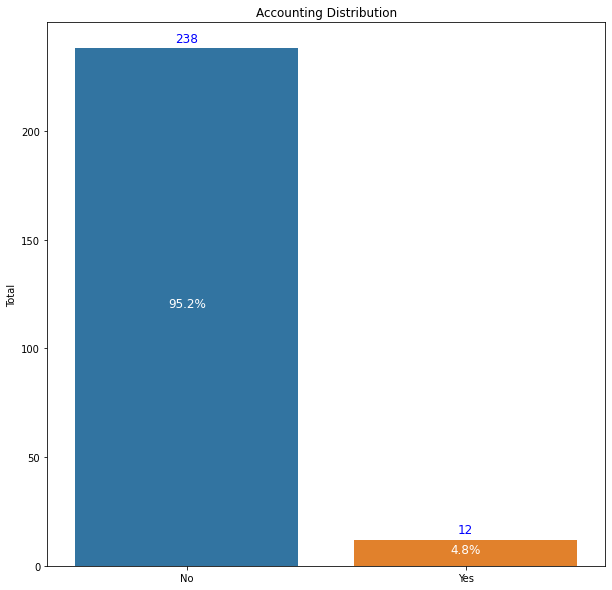

,Total,Percent
No,238,0.952
Yes,12,0.048


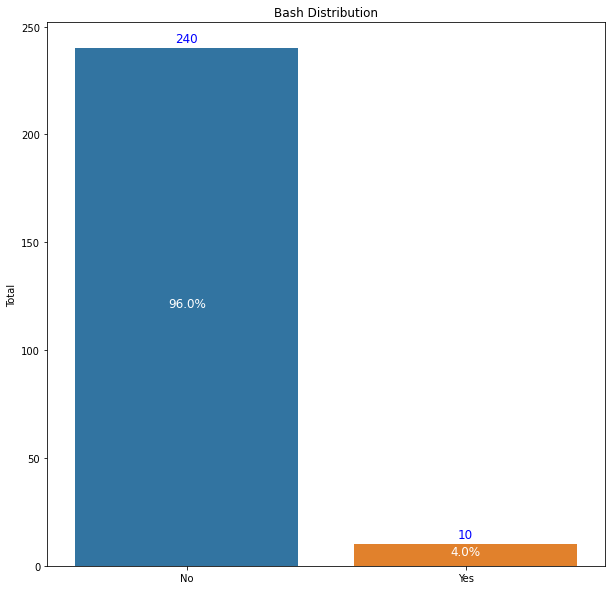

,Total,Percent
No,240,0.96
Yes,10,0.04


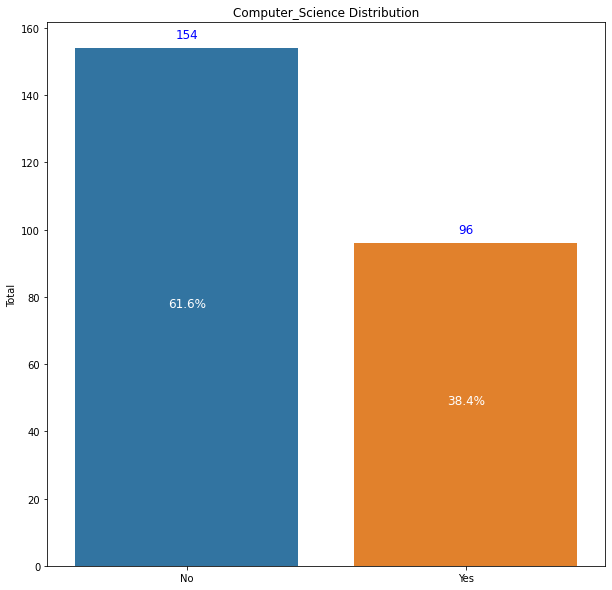

,Total,Percent
No,154,0.616
Yes,96,0.384


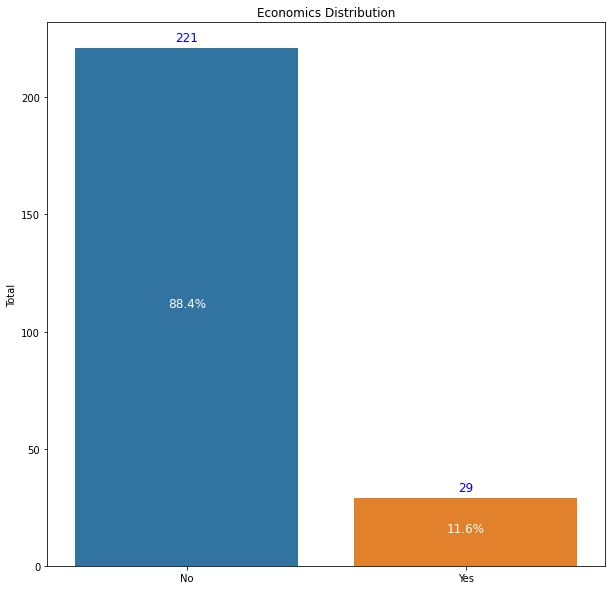

,Total,Percent
No,221,0.884
Yes,29,0.116


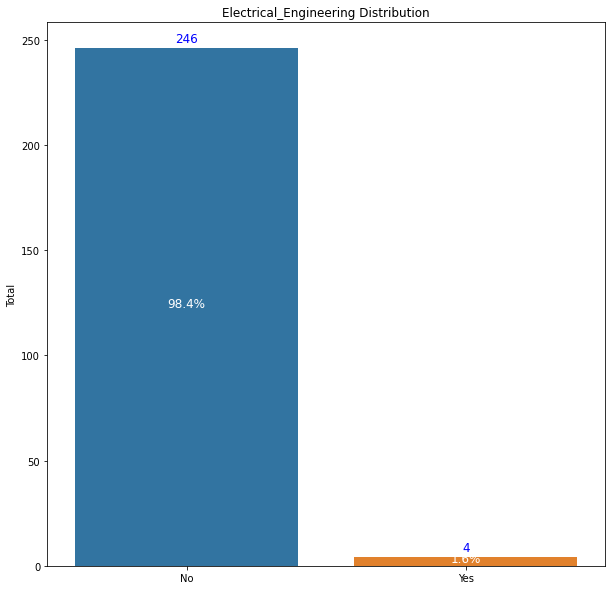

,Total,Percent
No,246,0.984
Yes,4,0.016


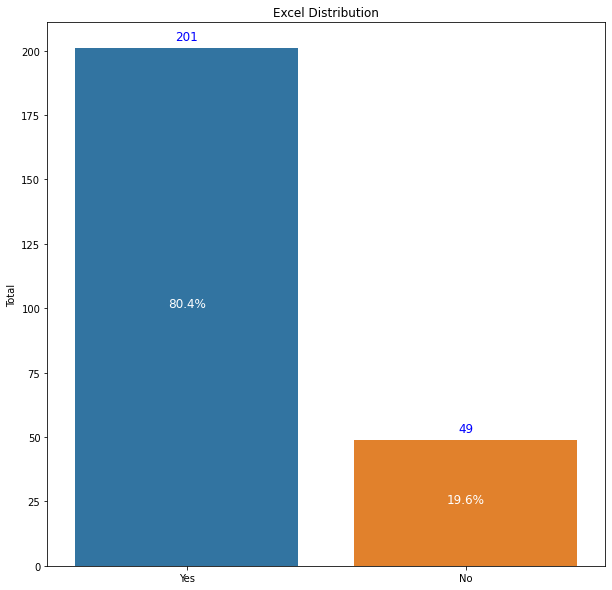

,Total,Percent
Yes,201,0.804
No,49,0.196


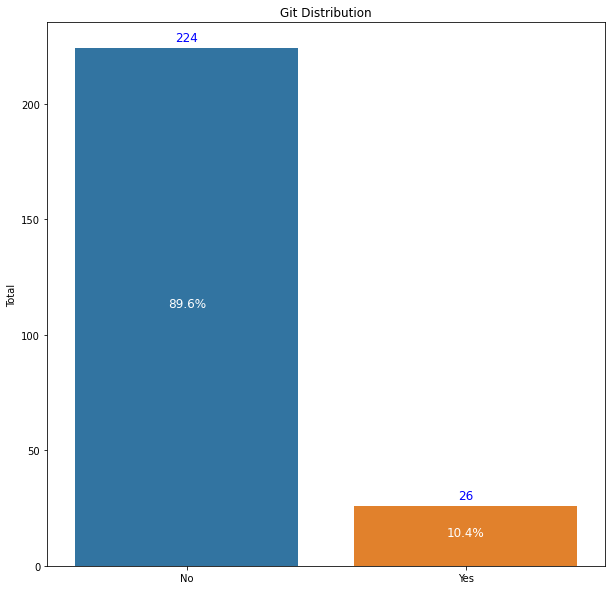

,Total,Percent
No,224,0.896
Yes,26,0.104


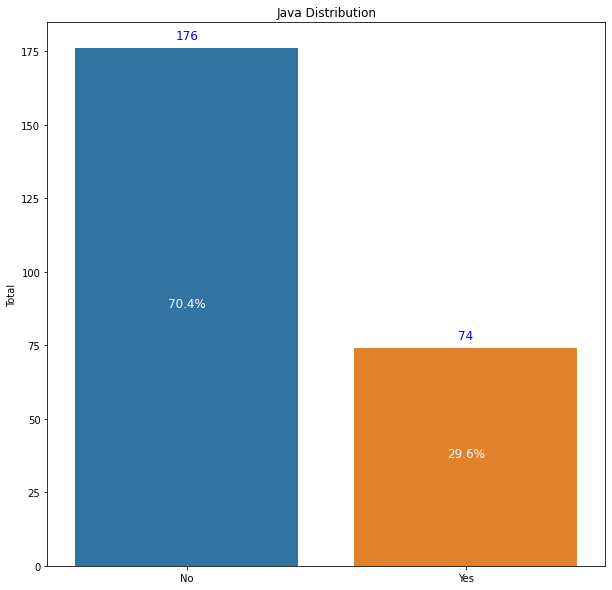

,Total,Percent
No,176,0.704
Yes,74,0.296


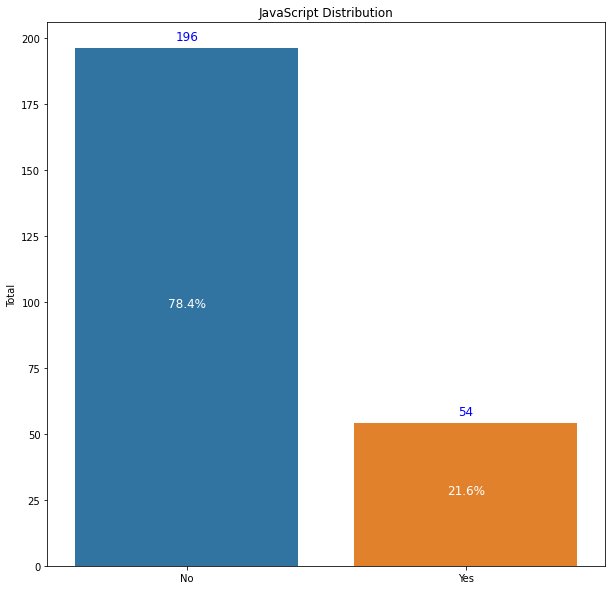

,Total,Percent
No,196,0.784
Yes,54,0.216


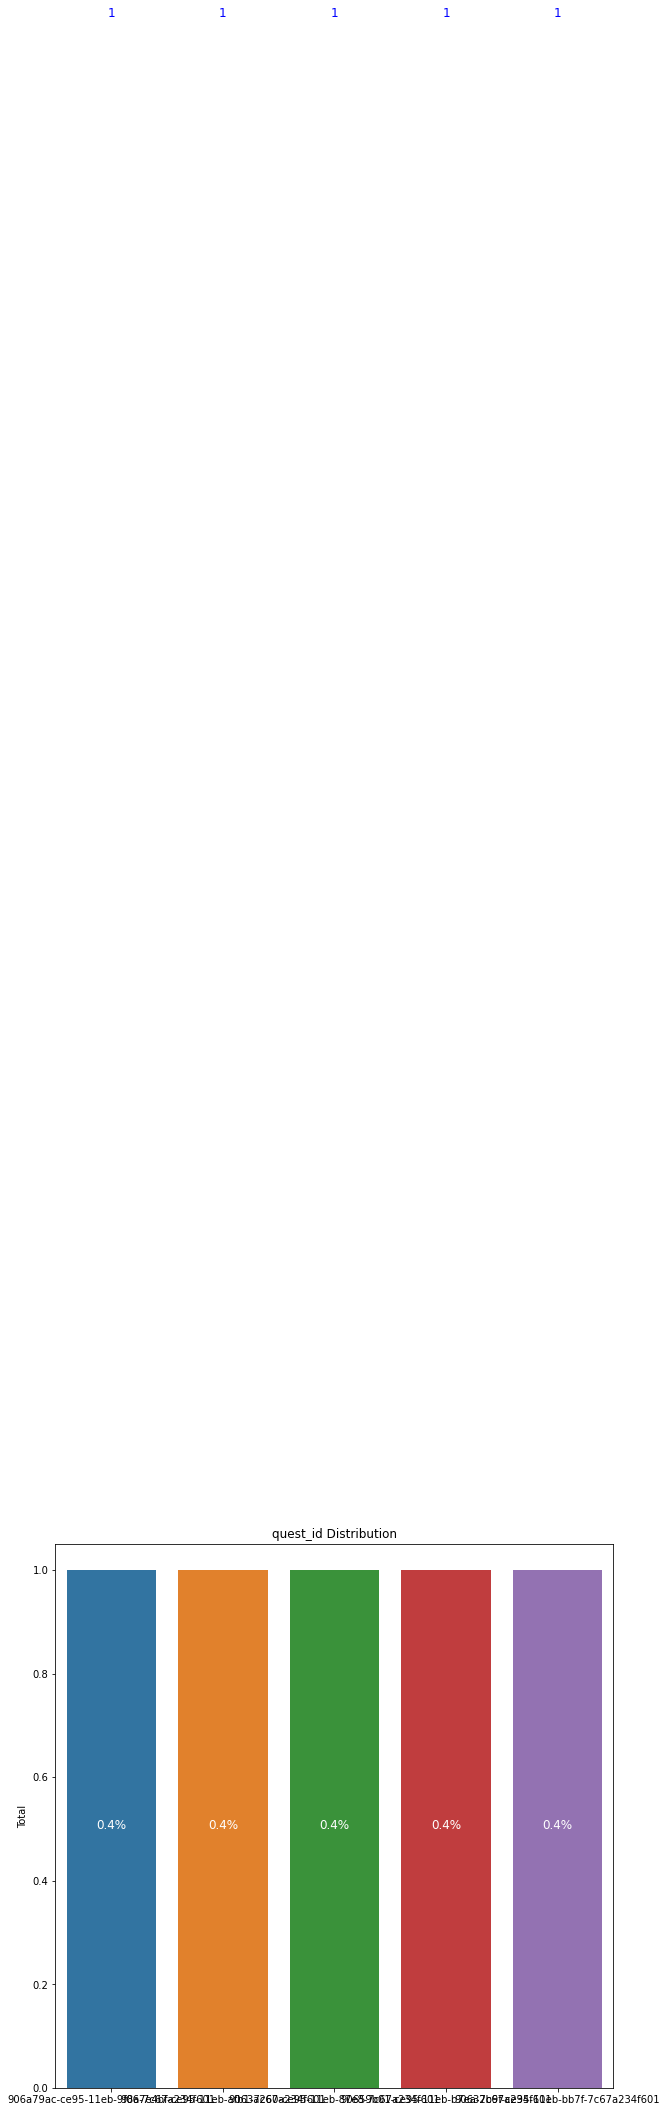

,Total,Percent
906a79ac-ce95-11eb-9f8a-7c67a234f601,1,0.004
9067e4bf-ce95-11eb-afb1-7c67a234f601,1,0.004
9063a260-ce95-11eb-87e8-7c67a234f601,1,0.004
90659b01-ce95-11eb-b7ea-7c67a234f601,1,0.004
90632b9f-ce95-11eb-bb7f-7c67a234f601,1,0.004
...,...,...
9061312a-ce95-11eb-ba28-7c67a234f601,1,0.004
906178f8-ce95-11eb-95e9-7c67a234f601,1,0.004
9064d83c-ce95-11eb-bc96-7c67a234f601,1,0.004
9064d83a-ce95-11eb-9bef-7c67a234f601,1,0.004


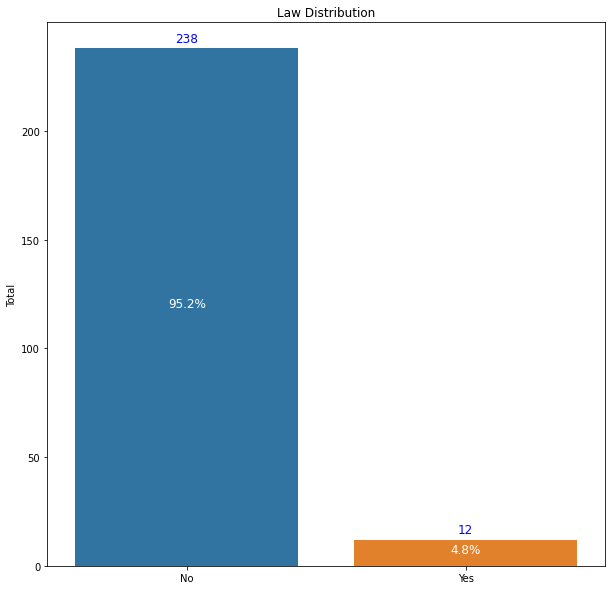

,Total,Percent
No,238,0.952
Yes,12,0.048


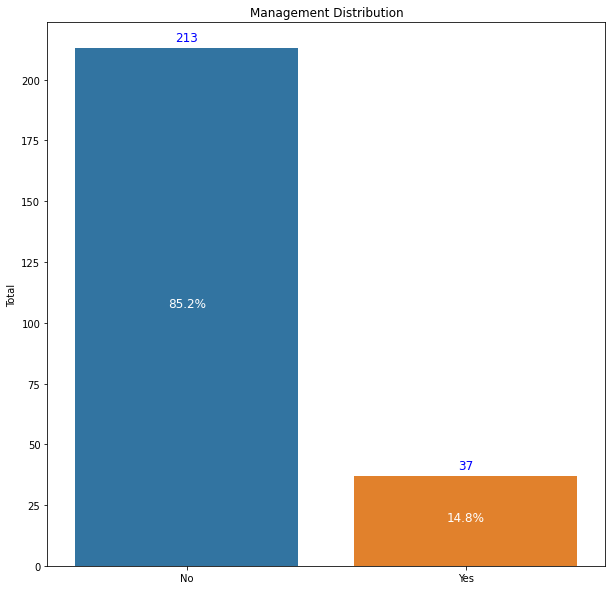

,Total,Percent
No,213,0.852
Yes,37,0.148


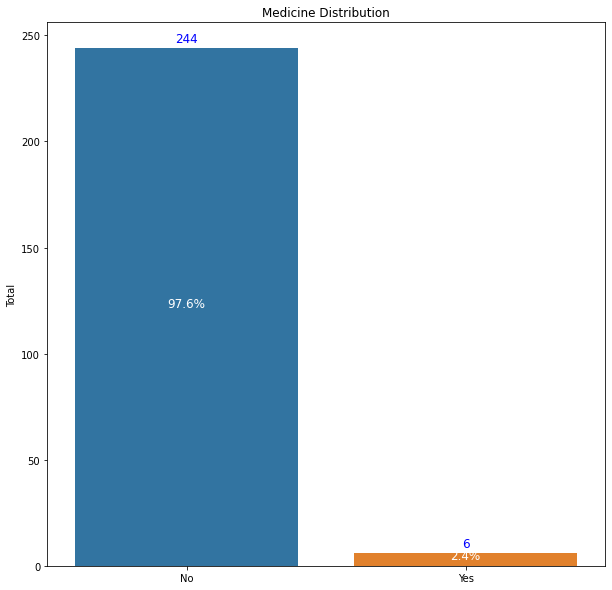

,Total,Percent
No,244,0.976
Yes,6,0.024


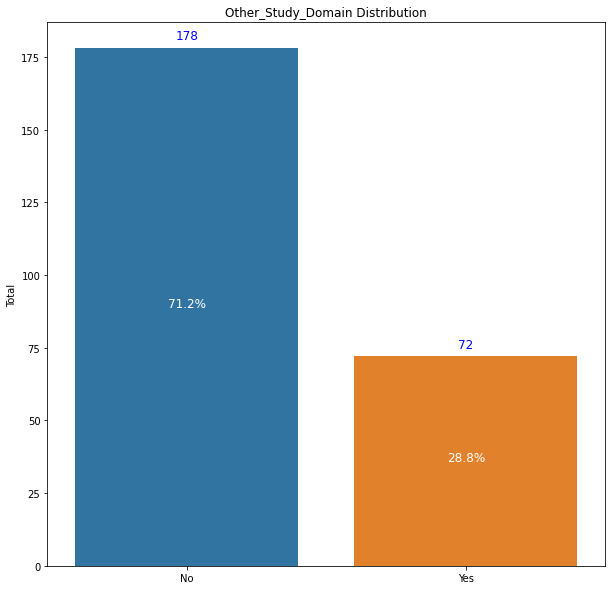

,Total,Percent
No,178,0.712
Yes,72,0.288


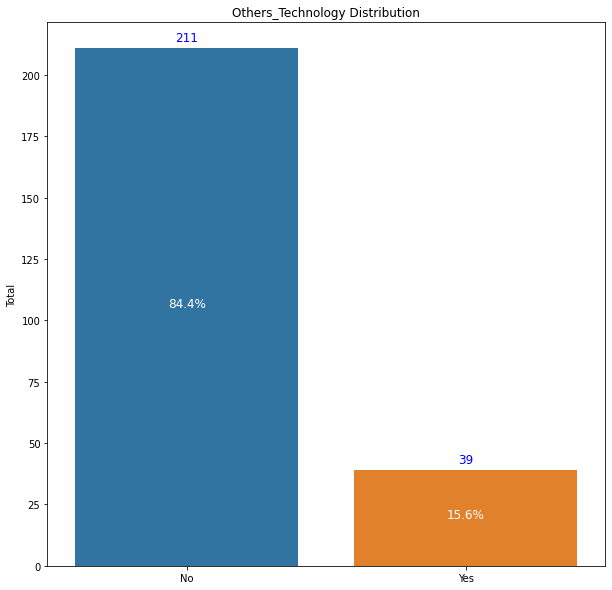

,Total,Percent
No,211,0.844
Yes,39,0.156


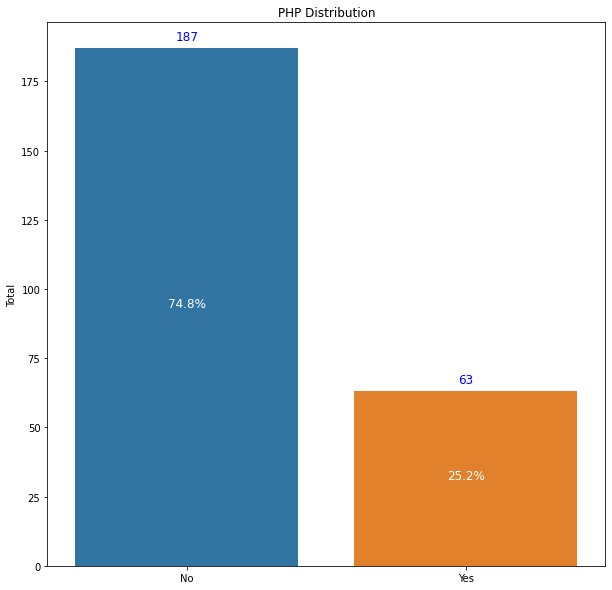

,Total,Percent
No,187,0.748
Yes,63,0.252


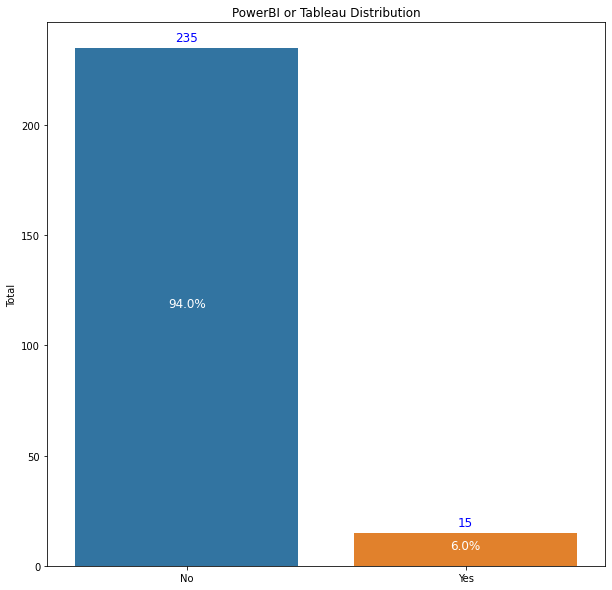

,Total,Percent
No,235,0.94
Yes,15,0.06


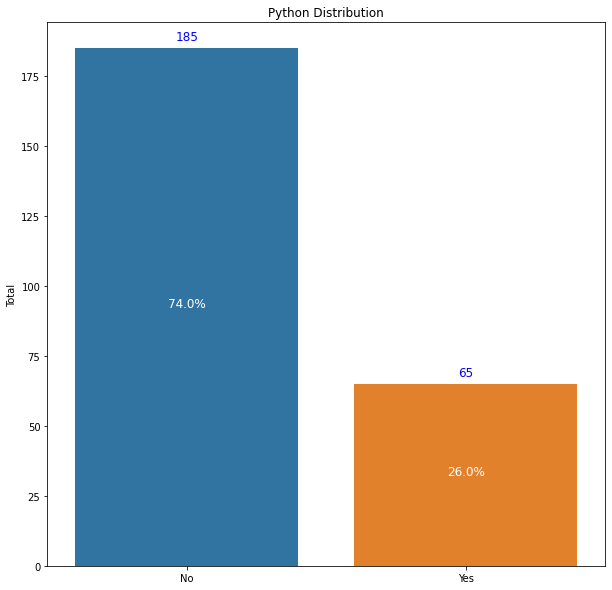

,Total,Percent
No,185,0.74
Yes,65,0.26


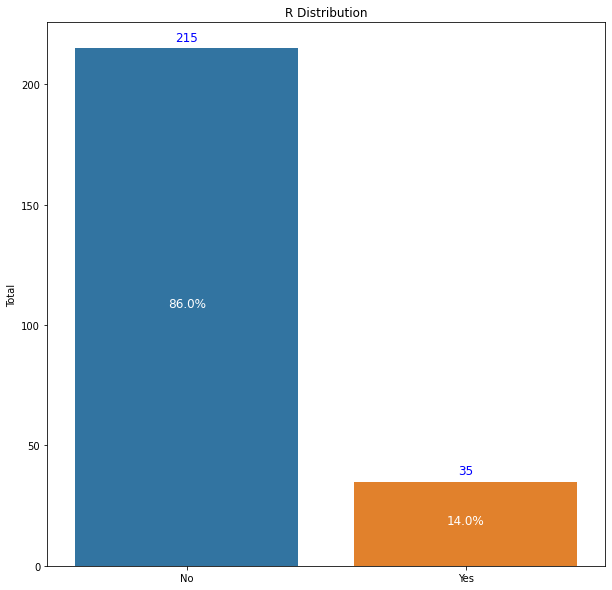

,Total,Percent
No,215,0.86
Yes,35,0.14


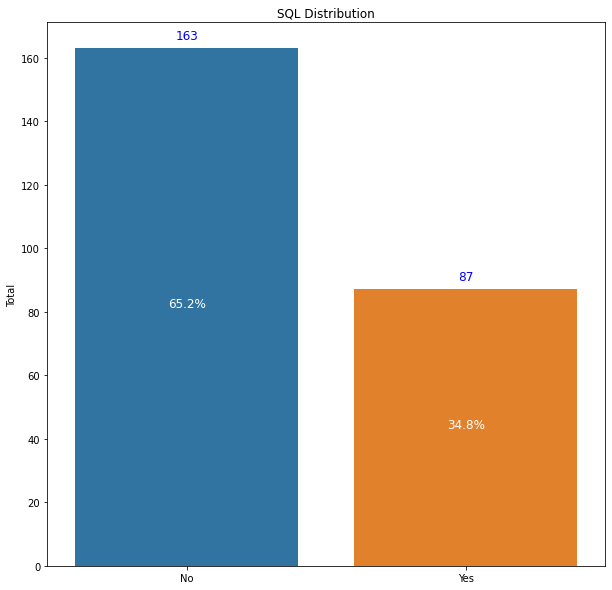

,Total,Percent
No,163,0.652
Yes,87,0.348


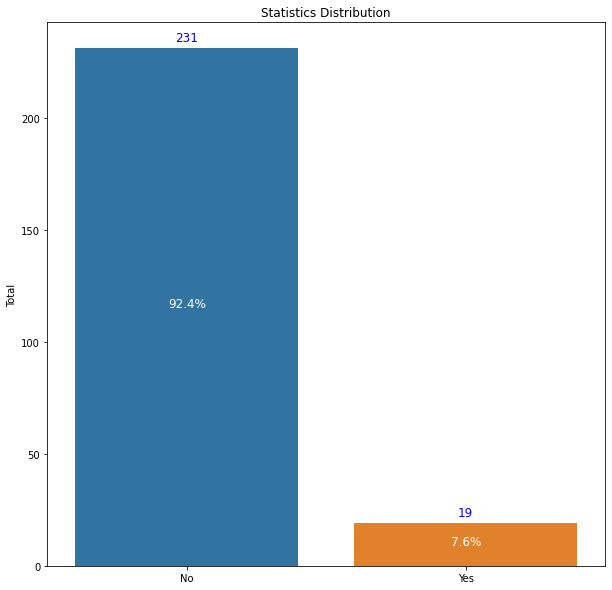

,Total,Percent
No,231,0.924
Yes,19,0.076


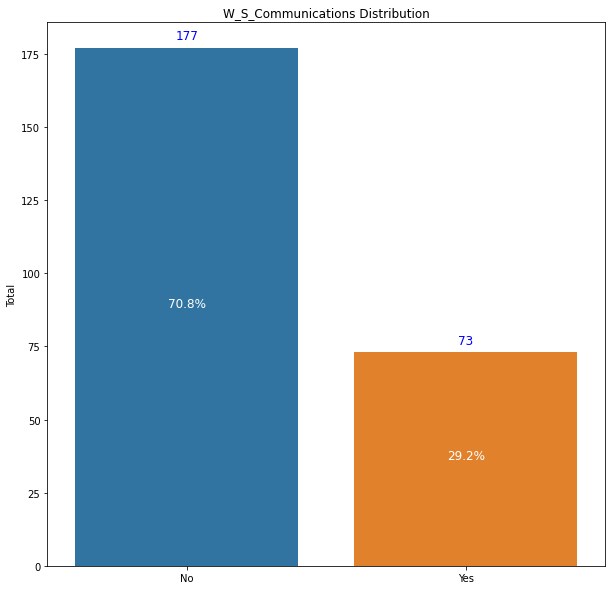

,Total,Percent
No,177,0.708
Yes,73,0.292


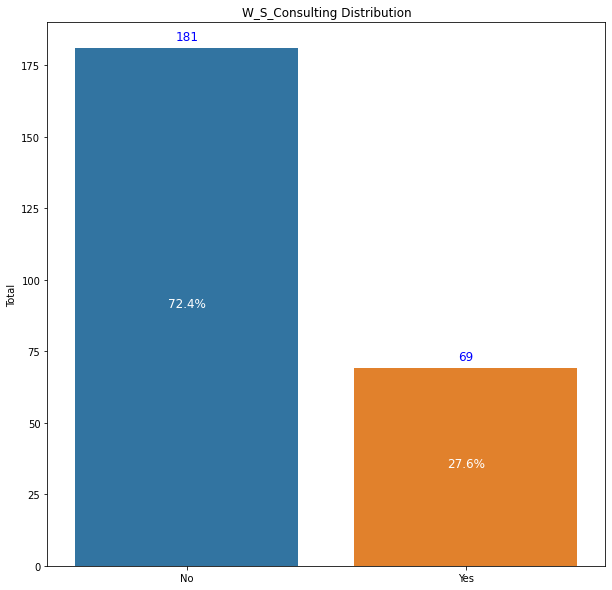

,Total,Percent
No,181,0.724
Yes,69,0.276


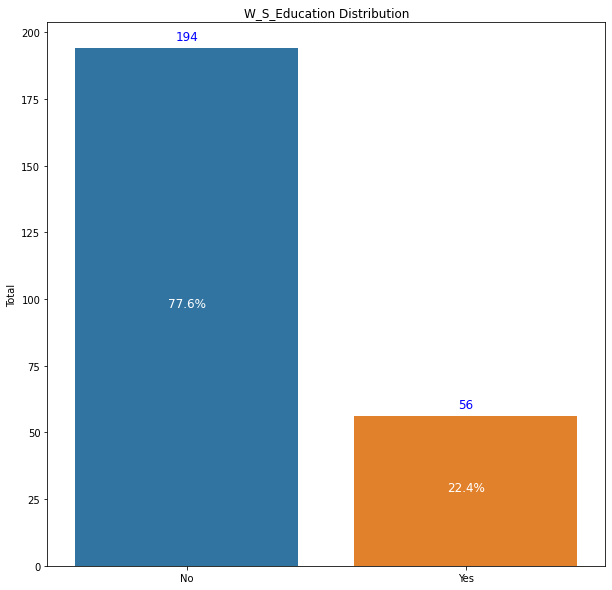

,Total,Percent
No,194,0.776
Yes,56,0.224


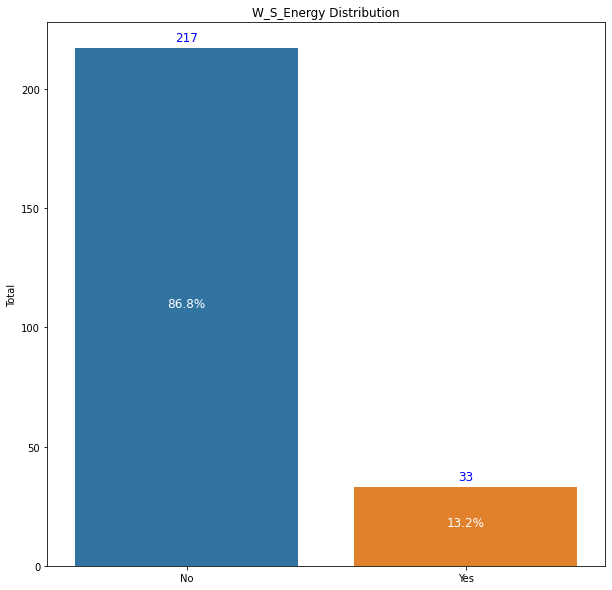

,Total,Percent
No,217,0.868
Yes,33,0.132


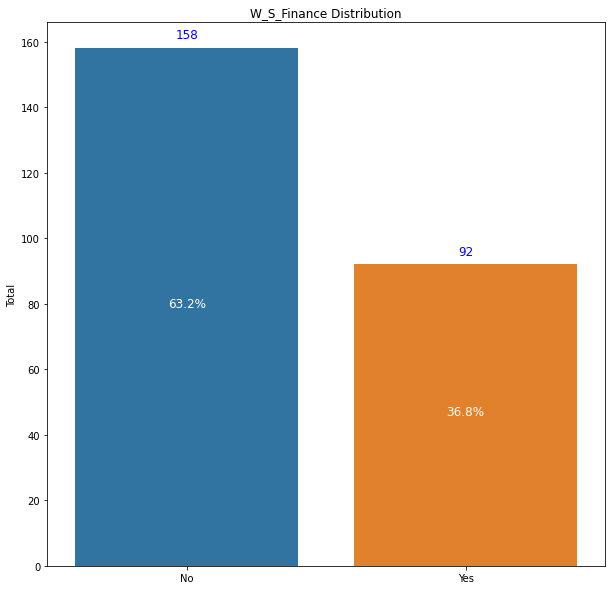

,Total,Percent
No,158,0.632
Yes,92,0.368


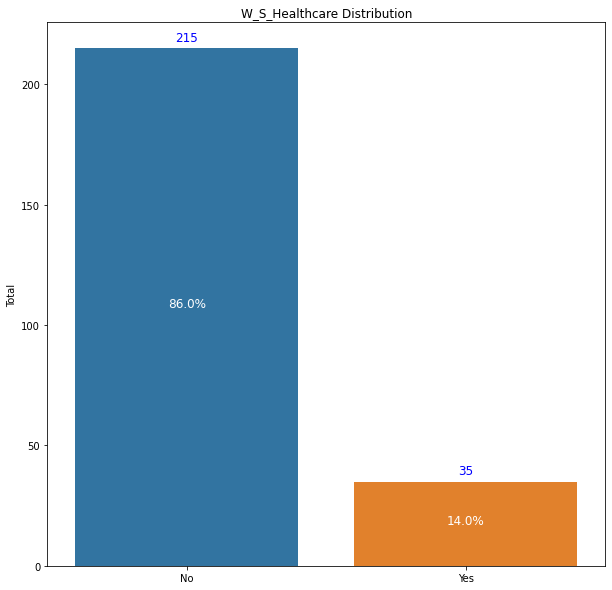

,Total,Percent
No,215,0.86
Yes,35,0.14


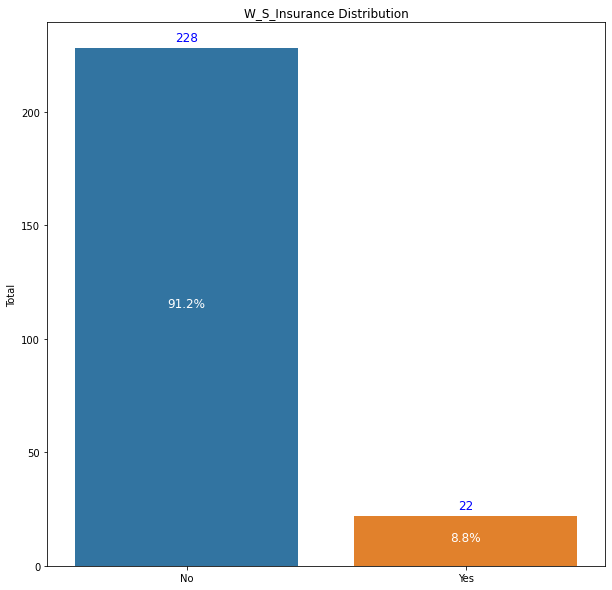

,Total,Percent
No,228,0.912
Yes,22,0.088


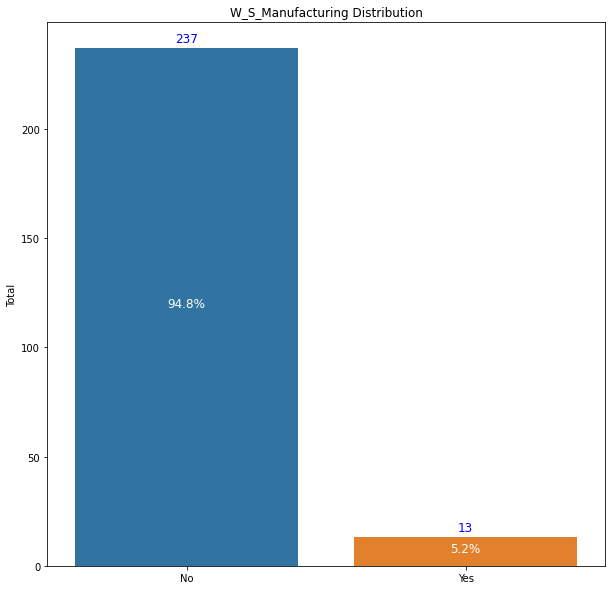

,Total,Percent
No,237,0.948
Yes,13,0.052


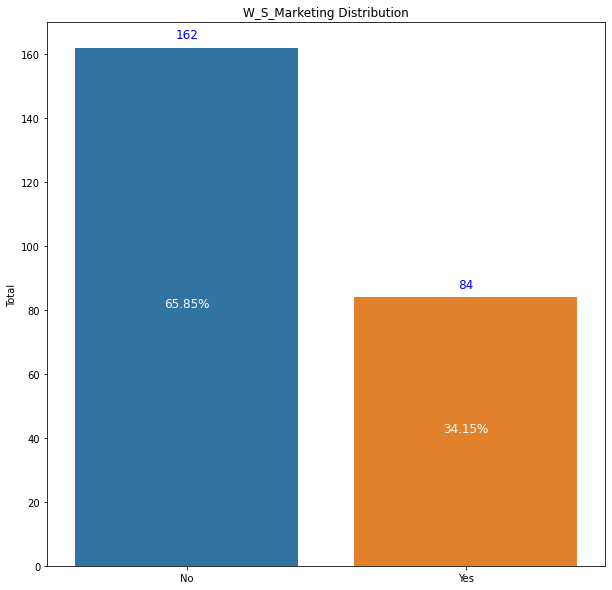

,Total,Percent
No,162,0.658537
Yes,84,0.341463


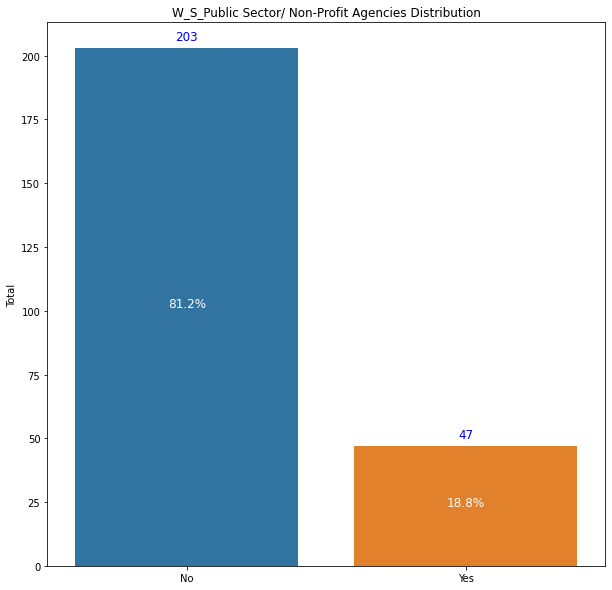

,Total,Percent
No,203,0.812
Yes,47,0.188


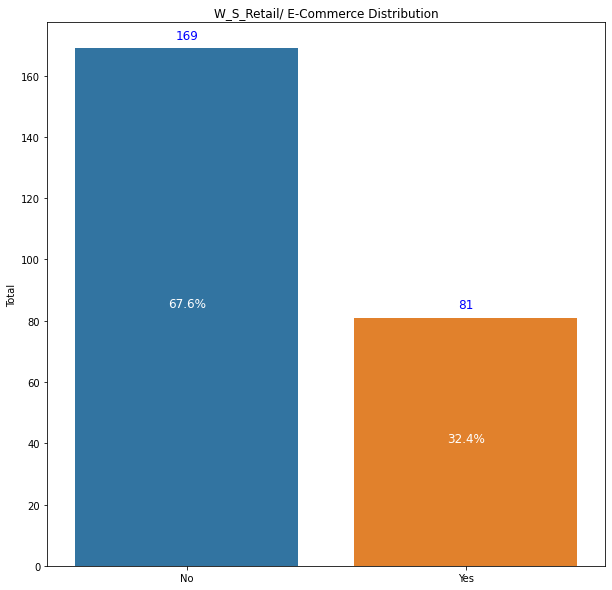

,Total,Percent
No,169,0.676
Yes,81,0.324


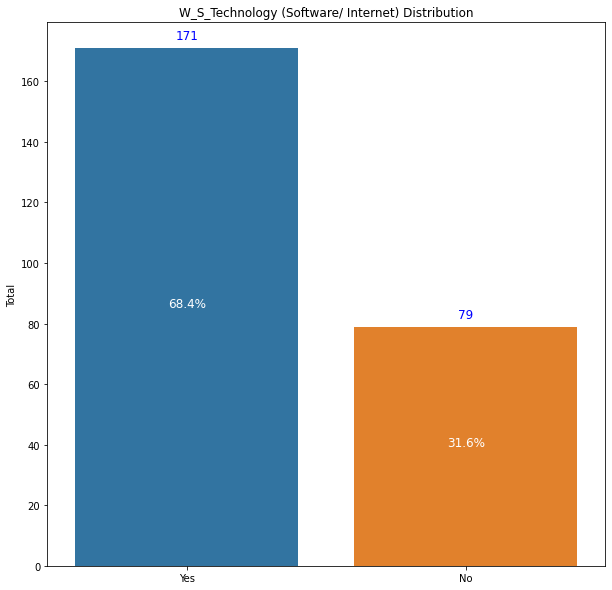

,Total,Percent
Yes,171,0.684
No,79,0.316


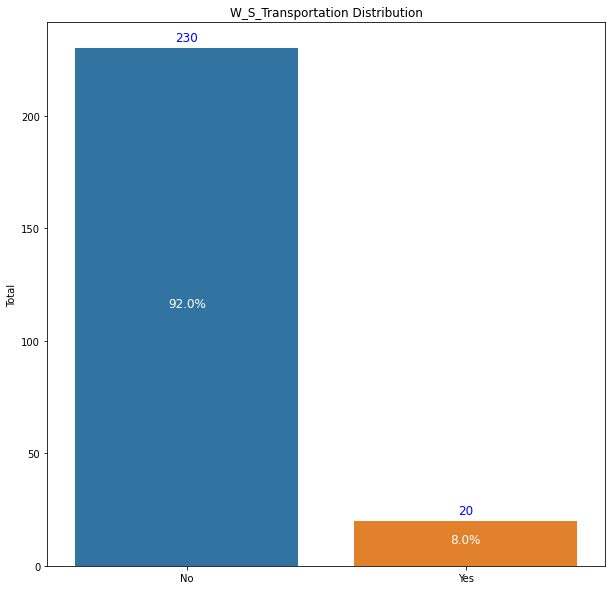

,Total,Percent
No,230,0.92
Yes,20,0.08


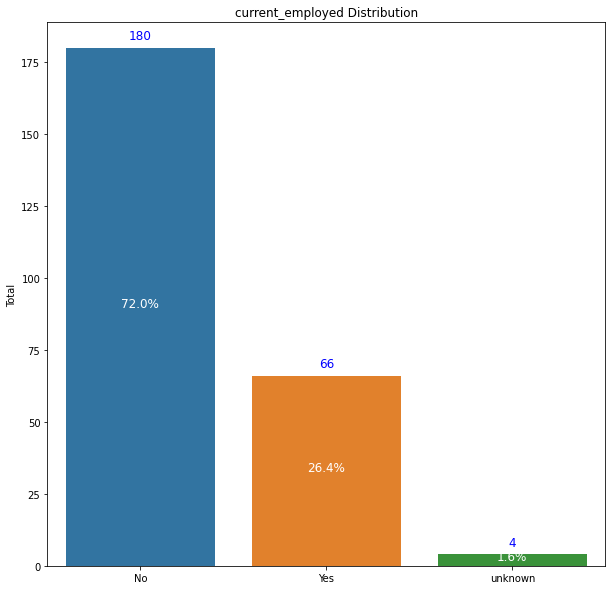

,Total,Percent
No,180,0.720
Yes,66,0.264
unknown,4,0.016


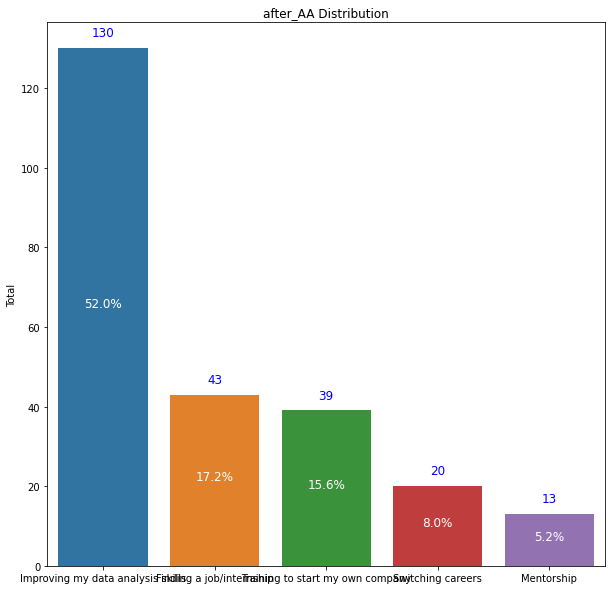

,Total,Percent
Improving my data analysis skills,130,0.520
Finding a job/internship,43,0.172
Training to start my own company,39,0.156
Switching careers,20,0.080
Mentorship,13,0.052
other,3,0.012
unknown,2,0.008


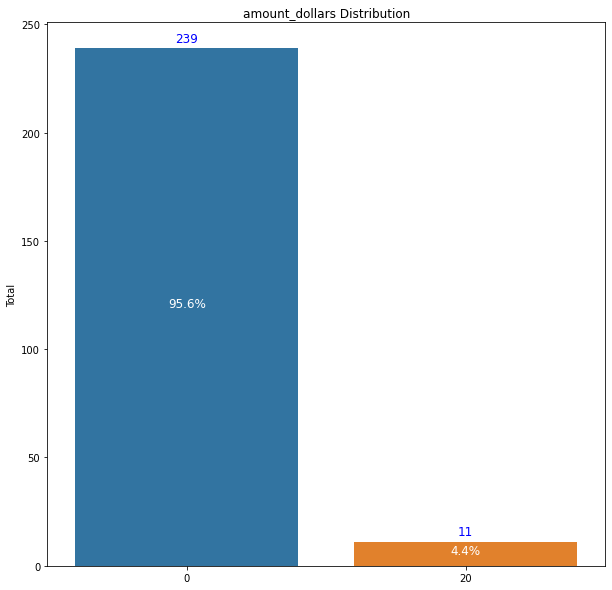

,Total,Percent
0,239,0.956
20,11,0.044


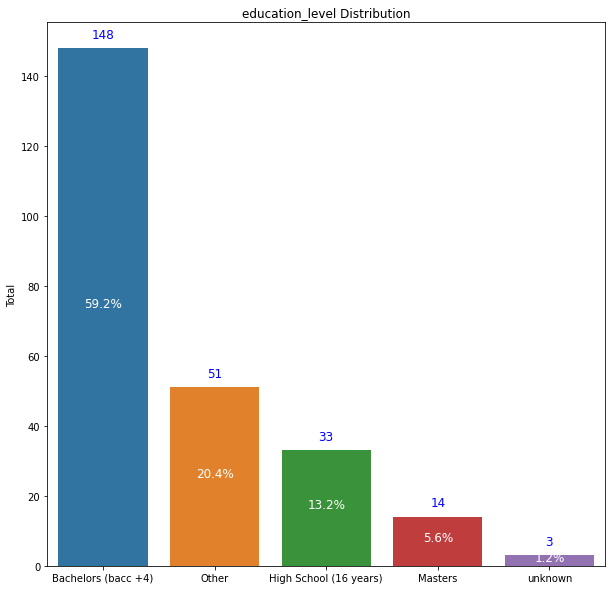

,Total,Percent
Bachelors (bacc +4),148,0.592
Other,51,0.204
High School (16 years),33,0.132
Masters,14,0.056
unknown,3,0.012
"Doctorate (PhD, MD, JD)",1,0.004


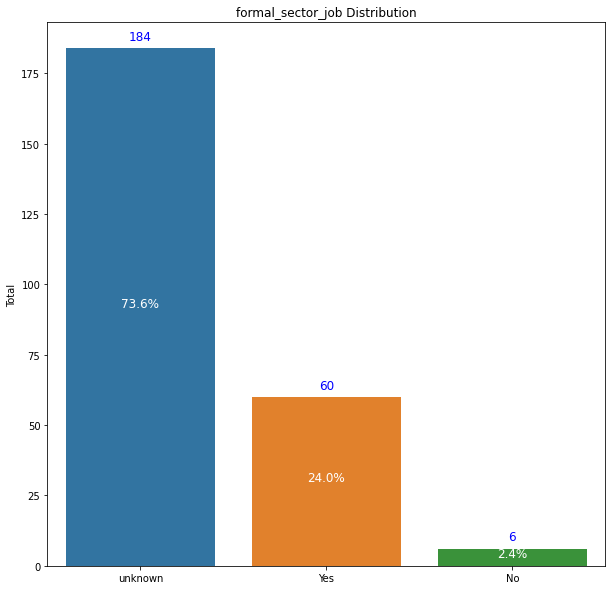

,Total,Percent
unknown,184,0.736
Yes,60,0.240
No,6,0.024


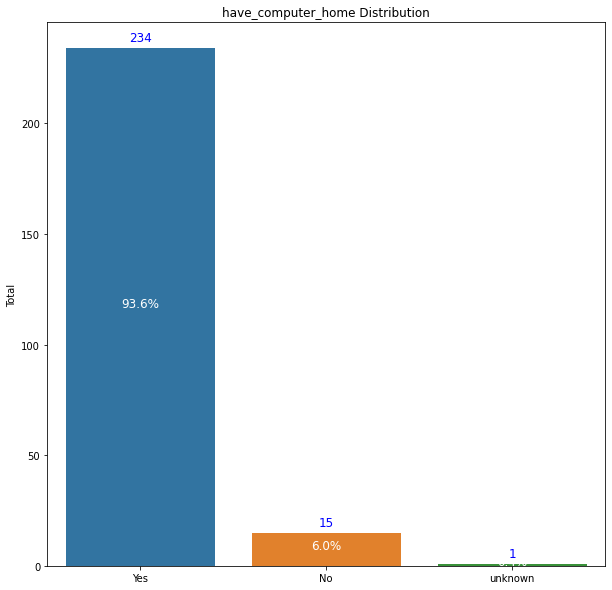

,Total,Percent
Yes,234,0.936
No,15,0.060
unknown,1,0.004


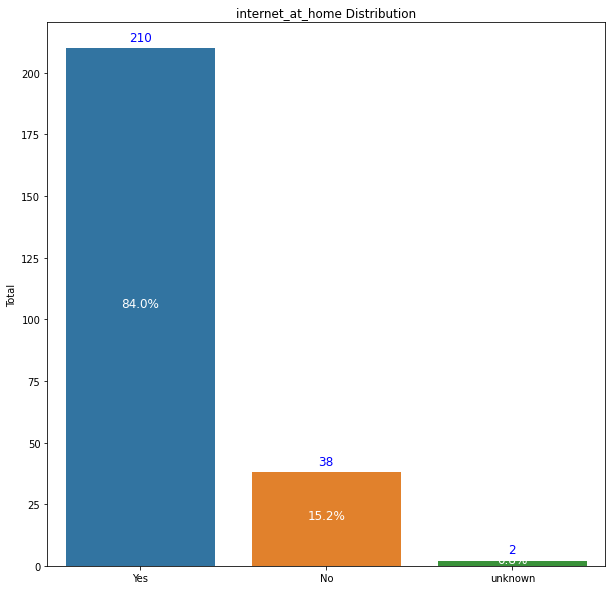

,Total,Percent
Yes,210,0.840
No,38,0.152
unknown,2,0.008


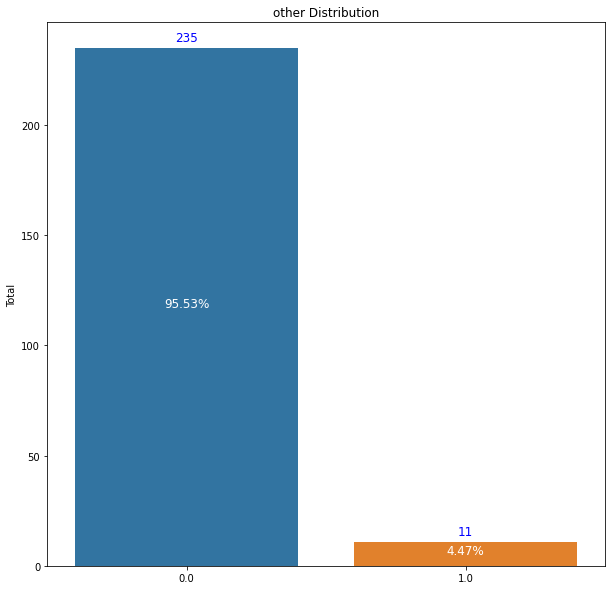

,Total,Percent
0.0,235,0.955285
1.0,11,0.044715


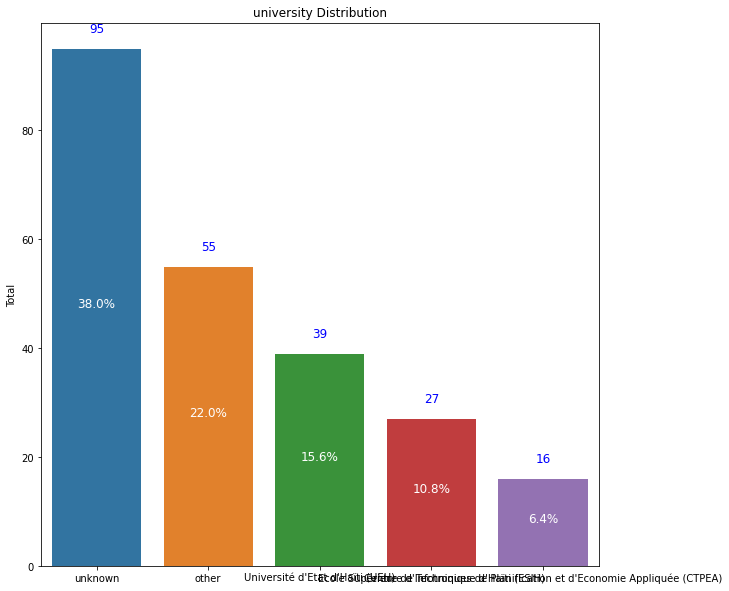

,Total,Percent
unknown,95,0.380
other,55,0.220
Université d'Etat d'Haïti (UEH),39,0.156
Ecole Supérieure d'Infotronique d'Haïti (ESIH),27,0.108
Centre de Techniques de Planification et d'Economie Appliquée (CTPEA),16,0.064
Université INUKA,14,0.056
Quisqueya University,4,0.016


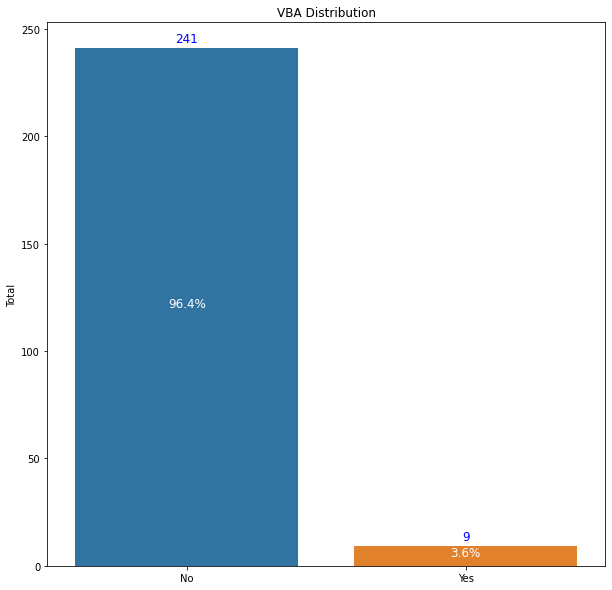

,Total,Percent
No,241,0.964
Yes,9,0.036


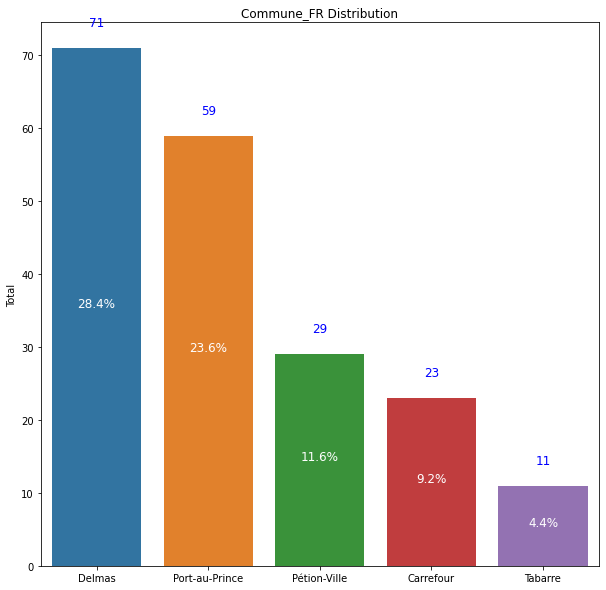

,Total,Percent
Delmas,71,0.284
Port-au-Prince,59,0.236
Pétion-Ville,29,0.116
Carrefour,23,0.092
Tabarre,11,0.044
Croix-Des-Bouquets,10,0.040
Cap-Haïtien,5,0.020
Saint-Marc,4,0.016
Jacmel,3,0.012
Verrettes,3,0.012


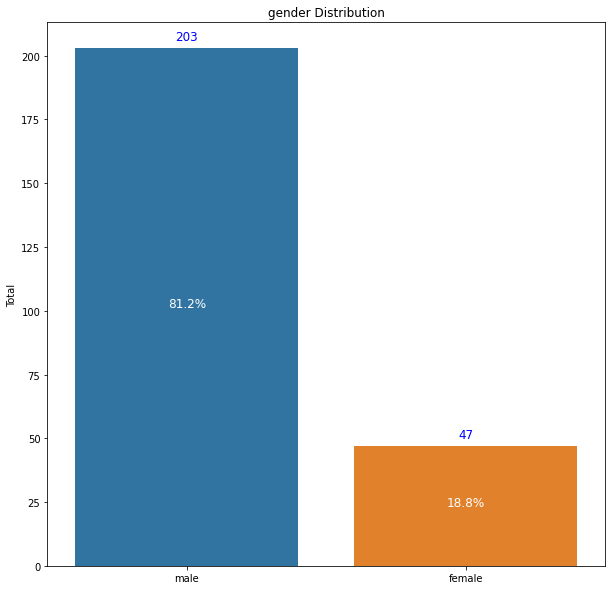

,Total,Percent
male,203,0.812
female,47,0.188


In [31]:
#Show all univariate analysis succesively
for cat_col in cat_dataset:
  result = prob_category(data=cat_dataset,col=cat_col, abs_value ="Total",rel_value ="Percent",show_plot=True,title=f"{cat_col} Distribution")
  display(result)

### Project Goals
Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students

-How many applications must be made to select 25% women for each on average?

-What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection?

-What is the average number of university students who should participate in this program?

-What will be the average number of applications per week that we could have
How many weeks should we extend the application process to select 60 students per commune?

-If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time.

-What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

#Question solution rubric
### Ayiti Analytics objective is to know which three communes of the country will be the most likely to expand its training centers.

In [32]:
# Ayiti Analytics objective is to know which three communes of the country will be the most likely to expand its training centers.
# Selection criteria for municipalities:
#1- "The greatest number of registrants".
#2- How many of them have already payed
#3-If we apply this criteria

#Find how many applicants by Commune
total_enscript_by_commune= result5.Commune_FR.value_counts(normalize=False).to_frame()
total_enscript_by_commune.rename(columns={"Commune_FR": "Total"},inplace=True)
#print(total_enscript_by_commune)

#Find how many applicants by "commune" and "Amount_Payed"
Total_Pay_By_Commune =result5.groupby(by=["Commune_FR"]).amount_dollars.sum().to_frame()
Total_Pay_By_Commune.rename(columns={"amount_dollars": "Total Pay"},inplace=True)
Total_Pay_By_Commune.sort_values(by=['Total Pay'],  ascending=False, inplace=True)
#print(Total_Pay_By_Commune)

#Find percent pay by commune
Percent_pay_by_Commune = Total_Pay_By_Commune =result5.groupby(by=["Commune_FR"]).amount_dollars.sum().to_frame()/result5.shape[0]
Percent_pay_by_Commune.rename(columns={"amount_dollars": "Percent_Pay"},inplace=True)
Percent_pay_by_Commune.sort_values(by=['Percent_Pay'],  ascending=False, inplace=True)
#print(Percent_pay_by_Commune)


Valid_Commune= pd.concat([Percent_pay_by_Commune,total_enscript_by_commune],axis=1)
print(Valid_Commune)

#t =total_enscript_by_commune.reset_index()
#t.drop(t.index[t['index'] == 'Port-au-Prince'], inplace = True)
#t

                                Percent_Pay  Total
Delmas                                 0.32     71
Port-au-Prince                         0.24     59
Croix-Des-Bouquets                     0.08     10
Jacmel                                 0.08      3
Verrettes                              0.08      3
Mirebalais                             0.08      3
Saint-Louis du Nord                    0.00      1
Saint-Marc                             0.00      4
Sainte Suzanne                         0.00      1
Pétion-Ville                           0.00     29
Léogâne                                0.00      2
Port-Salut                             0.00      1
Plaine du Nord                         0.00      1
Petite Rivière de l'Artibonite         0.00      1
Petite Rivière de Nippes               0.00      1
Petit-Goâve                            0.00      1
Tabarre                                0.00     11
Ouanaminthe                            0.00      3
Mombin Crochu                  

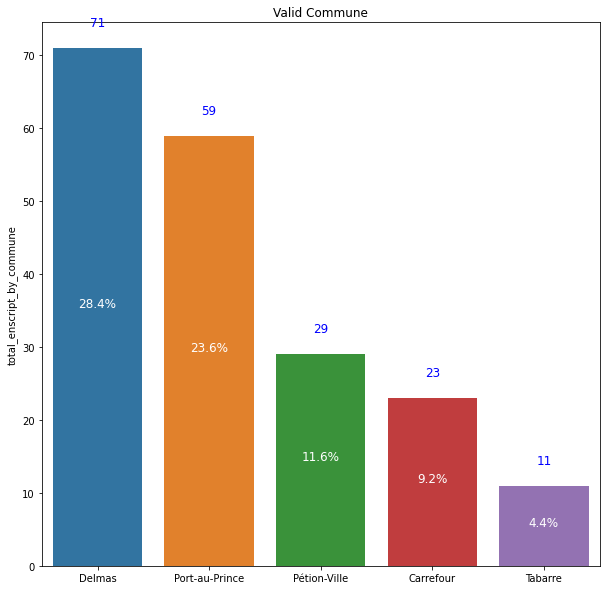

Based on this table, Ayiti Analytics must choose to open theirs training centers in the tree most important commune :Delmas, Port-au-Prince, Petion-ville


In [33]:

result6 = prob_category(data=result5,col="Commune_FR",abs_value="total_enscript_by_commune",rel_value="Percent_pay_by_Commune",show_plot=True, title="Valid Commune")
print("Based on this table, Ayiti Analytics must choose to open theirs training centers in the tree most important commune :" 
       "Delmas, Port-au-Prince, Petion-ville")

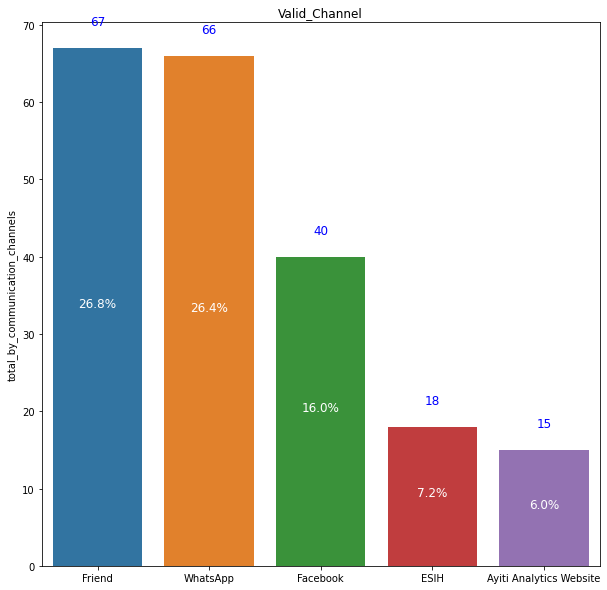

Based on this graph, the 3 most effective channels that will allow a student to be susceptible to selection are the three first like : Friend, Whatsapp, Facebook


,total_by_communication_channels,Percent_by_communication_channels
Friend,67,0.268
WhatsApp,66,0.264
Facebook,40,0.160
ESIH,18,0.072
Ayiti Analytics Website,15,0.060
LinkedIn,15,0.060
Bootcamp Alumni,14,0.056
other,9,0.036
Instagram,5,0.020
unknown,1,0.004


In [34]:
# What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection?

#Find total applicants by Channel
total_by_communication_channels= result5.Communication_Channel.value_counts(normalize=False).to_frame()
total_by_communication_channels.rename(columns={"Communication_Channel": "Total"},inplace=True)
#print(total_by_communication_channels)

#Find Percent Application by Channel
Percent_by_communication_channels =result5.Communication_Channel.value_counts(normalize=False).to_frame()/result5.shape[0]
Percent_by_communication_channels.rename(columns={"Communication_Channel": "Percent_by_Channel"}, inplace=True)
#print(Percent_by_communication_channels)

#Merge 2 previous table
Valid_Channel= pd.concat([Percent_by_communication_channels,total_by_communication_channels],axis=1)
#print(Valid_Channel)

#generate_barchart(data=Valid_Channel,title="Total and percent by channel", abs_value="Total",rel_value="Percent")

result7 = prob_category(data=result5,col="Communication_Channel",abs_value="total_by_communication_channels",rel_value="Percent_by_communication_channels",show_plot=True, title="Valid_Channel")
print("Based on this graph, the 3 most effective channels that will allow a student to be susceptible to selection are the three first like : Friend, Whatsapp, Facebook")
result7

### What is the average number of university students who should participate in this program?

In [95]:
#What is the average number of university students who should participate in this program?

#Find repartition by University
total_by_university= result5.university.value_counts(normalize=False).to_frame()
total_by_university.rename(columns={"university": "Total"},inplace=True)
#print(total_by_university)

#Find repartition ration by University
Percent_by_university =result5.university.value_counts(normalize=False).to_frame()/result5.shape[0]
Percent_by_university.rename(columns={"university": "Percent"}, inplace=True)
#print(Percent_by_university)

#Merge 2 previous table
Valid_university= pd.concat([Percent_by_university,total_by_university],axis=1)
#print(Valid_university)

a=1-0.348 #Percent of students
b=250-87 #Number of students
c=20 #Actual_recruit_number
d=30 #Future_recruit_number
e=d/c #Growth_ratio
f=3 #Future_lab_number
b=b*e*f
b=int(b)

print(b)
print(b,"Based on our calculus,if everyone has the same chance of being selected by Ayiti Analytics, it would take the B value of students to have 30 students per cohort and per municipality.")


733
733 Based on our calculus,if everyone has the same chance of being selected by Ayiti Analytics, it would take the B value of students to have 30 students per cohort and per municipality.


### Transform future needed set 

In [114]:
#Apply function "Pivot_Table" to transform data_set

pvt_gender=pivot_table("gender")
pvt_education_level = pivot_table("education_level")
#Contact = pivotabl('Contact')
#Project = pivotabl('Project')
pvt_internet = pivot_table("internet_at_home")
pvt_computer = pivot_table("have_computer_home")
pvt_employed = pivot_table('current_employed')
#pv_payed = pivotabl("Payed")
pvt_internet.rename(columns={"No":"Do_not_have_internet", "Yes":"Have_internet"}, inplace=True)
pvt_internet.sort_values(by=['Have_internet'],ascending=False, inplace=True)
pvt_computer.rename(columns={"No":"Do_not_have_computer", "Yes":"Have_computer"}, inplace=True)
pvt_computer.sort_values(by=['Have_computer'],  ascending=False, inplace=True)
pvt_employed.rename(columns={"No":"Is_not_employed", "Yes":"Employed"}, inplace=True)
pvt_employed.sort_values(by=['Employed'],  ascending=False, inplace=True)
#pvt_payed.rename(columns={"No":"Do_not_have_payed", "Yes":"Have_payed"}, inplace=True)

#Drop unnecessary columns
pvt_internet.drop(['unknown', 'Do_not_have_internet'],axis="columns" , inplace=True)
pvt_computer.drop(['unknown', 'Do_not_have_computer'],axis="columns" , inplace=True)

#print result
print(pvt_internet)
print(pvt_computer)

internet_at_home                  No   Yes  unknown
Commune_FR                                         
Aquin                            0.0   1.0      0.0
Cap-Haïtien                      2.0   3.0      0.0
Caracol                          0.0   1.0      0.0
Carrefour                        5.0  18.0      0.0
Cité Soleil                      0.0   3.0      0.0
Cornillon / Grand Bois           0.0   1.0      0.0
Croix-Des-Bouquets               2.0   8.0      0.0
Delmas                          10.0  61.0      0.0
Dondon                           1.0   0.0      0.0
Ferrier                          0.0   1.0      0.0
Ganthier                         1.0   0.0      0.0
Grand-Goâve                      0.0   1.0      0.0
Gressier                         1.0   0.0      0.0
Gros Morne                       0.0   1.0      0.0
Hinche                           0.0   1.0      0.0
Jacmel                           0.0   3.0      0.0
Kenscoff                         0.0   1.0      0.0
Les Cayes   

### If we were to do all the bootcamp online, who would be the best communes if criteria is the higher percentage of students who have laptop?

have_computer_home              Total_Computer  Percent
Commune_FR                                             
Delmas                                    66.0    0.264
Port-au-Prince                            57.0    0.228
Pétion-Ville                              25.0    0.100
Carrefour                                 21.0    0.084
Tabarre                                   11.0    0.044
Croix-Des-Bouquets                        10.0    0.040
Cap-Haïtien                                5.0    0.020
Saint-Marc                                 4.0    0.016
Ouanaminthe                                3.0    0.012
Jacmel                                     3.0    0.012
Verrettes                                  3.0    0.012
Mirebalais                                 3.0    0.012
Cité Soleil                                3.0    0.012
Léogâne                                    2.0    0.008
Petite Rivière de l'Artibonite             1.0    0.004
Petite Rivière de Nippes                   1.0  

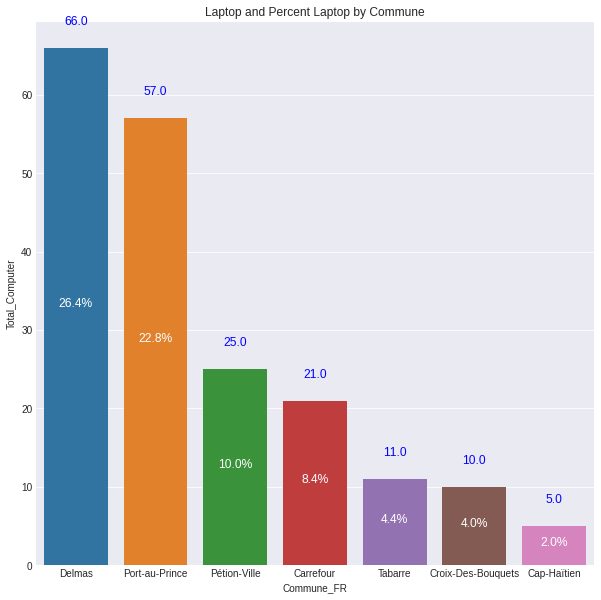

If one of the criteria is higher percent laptop by commune, Ayiti Analytics must choose the 3 first communes : Delmas, Port-au-Prince,Petion-Ville


In [138]:

"""If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time."""

#Found How many students have laptop by commune
#Calculate the percent of students who have a Laptop by commune

#Find how many applicants have a laptop by commune
#Find percent Laptop by commune
#Merge 2 previous table
#Do a graph
pvt_computer.rename(columns={"Have_computer":"Total_Computer"},inplace= True)
#print(pvt_computer)
Percent_Laptop_by_Commune= pvt_computer/result5.shape[0]
Percent_Laptop_by_Commune.rename(columns={"Total_Computer": "Percent"}, inplace=True)
#print(Percent_Laptop_by_Commune)
Valid_Laptop= pd.concat([pvt_computer,Percent_Laptop_by_Commune],axis=1)
print(Valid_Laptop)

result9= generate_barchart(data=Valid_Laptop.head(7),title="Laptop and Percent Laptop by Commune",abs_value="Total_Computer",rel_value="Percent")
print("If one of the criteria is higher percent laptop by commune, Ayiti Analytics must choose the 3 first communes : Delmas, Port-au-Prince,Petion-Ville")

### If we were to do all the bootcamp online, who would be the best communes if criteria is the higher percentage of students who have internet?

internet_at_home                Total_Internet  Percent_Internet_Access
Commune_FR                                                             
Delmas                                    61.0                    0.244
Port-au-Prince                            52.0                    0.208
Pétion-Ville                              25.0                    0.100
Carrefour                                 18.0                    0.072
Tabarre                                    9.0                    0.036
Croix-Des-Bouquets                         8.0                    0.032
Saint-Marc                                 4.0                    0.016
Verrettes                                  3.0                    0.012
Cité Soleil                                3.0                    0.012
Cap-Haïtien                                3.0                    0.012
Mirebalais                                 3.0                    0.012
Jacmel                                     3.0                  

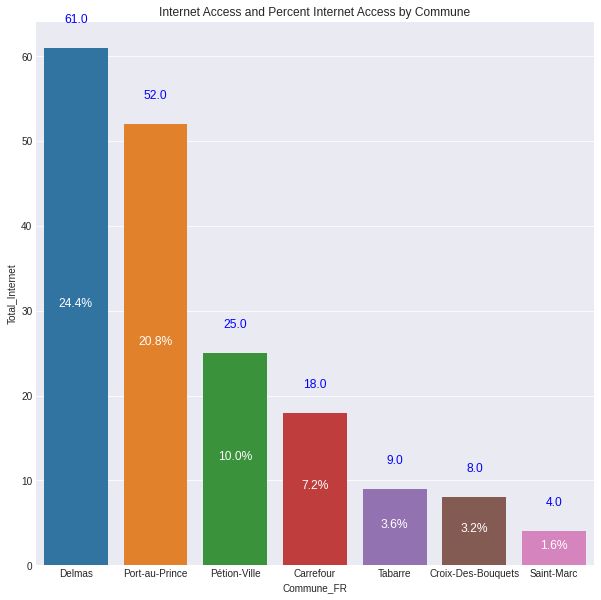

If one of the criteria is higher percent internet access by commune, Ayiti Analytics must choose the 3 first communes: Delmas, Port-au-Prince,Petion-Ville


In [139]:
#Found how many students have access to the electricity by commune
#Calculate the percent of students who have electricity access by commune


#Find how many applicants have electricity by commune
#Find percent of applicants who have electricity by commune
#Merge 2 previous table
#Do a graph
pvt_internet.rename(columns={"Have_internet":"Total_Internet"},inplace= True)
#print(pvt_computer)
Percent_internet_by_Commune= pvt_internet/result5.shape[0]
Percent_internet_by_Commune.rename(columns={"Total_Internet": "Percent_Internet_Access"}, inplace=True)
#print(Percent_internet_by_Commune)
Valid_internet= pd.concat([pvt_internet,Percent_internet_by_Commune],axis=1)
print(Valid_internet)

#result10 = prob_category(data=result5,col="Commune_FR",abs_value="Total_internet",rel_value="Percent_internet_by_Commune",show_plot=True, title="Internet Access and Percent Internet Access by Commune")
result10= generate_barchart(data=Valid_internet.head(7),title="Internet Access and Percent Internet Access by Commune",abs_value="Total_Internet",rel_value="Percent_Internet_Access")
print("If one of the criteria is higher percent internet access by commune, Ayiti Analytics must choose the 3 first communes: Delmas, Port-au-Prince,Petion-Ville")

### If we were to do all the bootcamp online, who would be the best communes if criteria is the higher percentage of students who have internet and computer at the same time?

                                internet_yes  computer_yes
Commune_FR                                                
Delmas                                  61.0          66.0
Port-au-Prince                          52.0          57.0
Pétion-Ville                            25.0          25.0
Carrefour                               18.0          21.0
Tabarre                                  9.0          11.0
Croix-Des-Bouquets                       8.0          10.0
Saint-Marc                               4.0           4.0
Verrettes                                3.0           3.0
Cap-Haïtien                              3.0           5.0
Cité Soleil                              3.0           3.0
Mirebalais                               3.0           3.0
Jacmel                                   3.0           3.0
Ouanaminthe                              2.0           3.0
Petite Rivière de Nippes                 1.0           1.0
Saint-Louis du Nord                      1.0           1

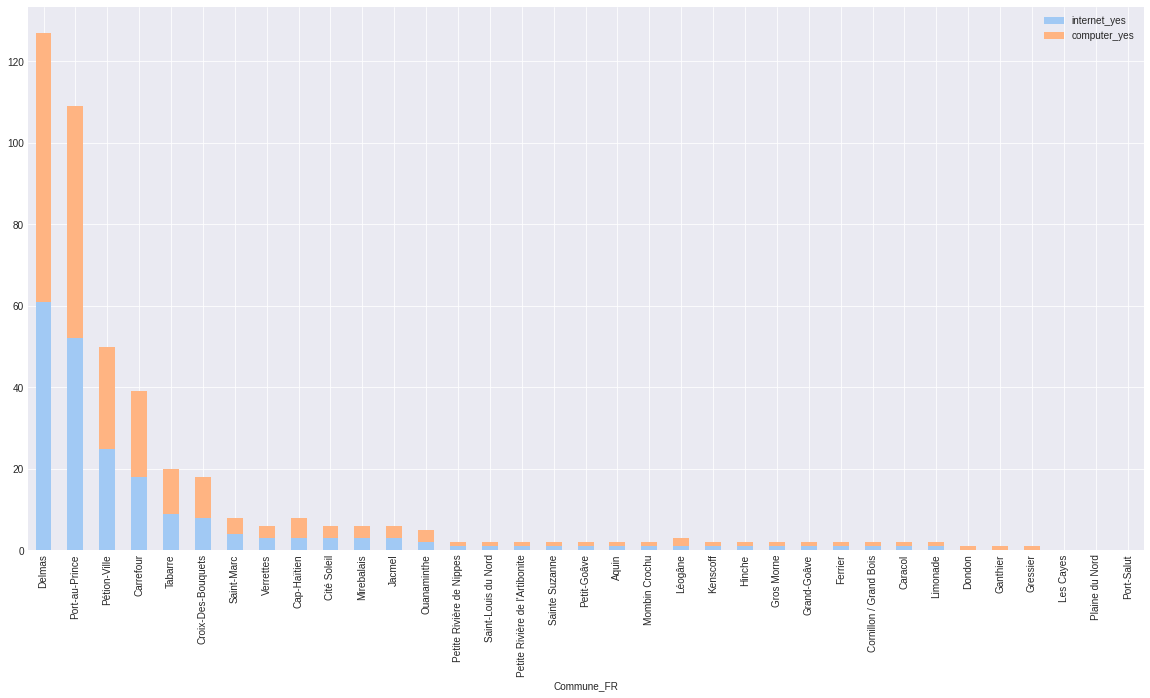

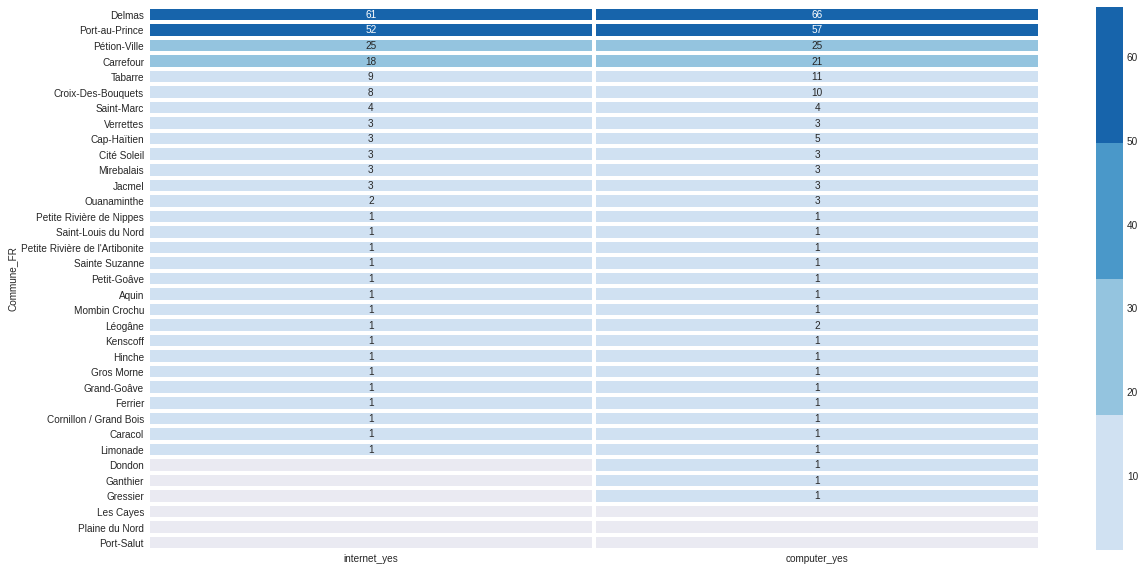

In [140]:
#Found how many students have access to the electricity and laptop by commune at the same time
#Calculate the percent of students who have electricity and laptop access by commune at the same time

#Find how many applicants have electricity and laptop by commune
#Find percent of applicants who have electricity and laptop by commune
#Merge 2 previous table
#Do a graph

from matplotlib.colors import ListedColormap

#Filt internet==Yes by quest_id and commune
result15 = pd.pivot_table(data=result5,values="quest_id",index="Commune_FR",columns="internet_at_home",aggfunc="count")
result15.rename(columns={"Yes":"internet_yes"},inplace=True)
result15.drop(["unknown", "No"],axis="columns", inplace=True)
#print(result15)

#Filt Computer==Yes by quest_id and commune
result16=pd.pivot_table(data=result5,values="quest_id",index="Commune_FR",columns="have_computer_home",aggfunc="count")
result16.rename(columns={"Yes":"computer_yes"},inplace=True)
result16.drop(["unknown", "No"],axis="columns", inplace=True)
#print(result16)

#merge the previous dataframe
result17=pd.concat([result15,result16],axis=1)
result17.sort_values(by=['internet_yes'], ascending=False, inplace=True)
print(result17)

#Graph
fig18 =result17.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("pastel", 2)), 
          figsize=(20,10))
print("Based on this Graph ,AyitiAnalytics must choose the three first communes : Delmas, Port-au-Prince, Petion-Ville")

#Heatmap repartition by commune for internet and computer values == yes
plt.figure(figsize=(20,10))
sns.heatmap(data=result17,cmap =ListedColormap(sns.color_palette("Blues", 4)),vmin =result17.min().min(),vmax =result17.max().max(),annot=True,linecolor="white",linewidths=3)

print("Based on this Graph ,AyitiAnalytics must choose the three first communes : Delmas, Port-au-Prince, Petion-Ville")

### Knowing that each cohort must have 30 students and you will have 3 cohorts
### How many applications must be made to select 25% women for each on average?

In [40]:
#Knowing that each cohort must have 30 students and you will have 3 cohorts
#How many applications must be made to select 25% women for each on average?

## Resolution Step ##
#Calculate the number of selected applicants
#Calculate the number of selected woman
#Actual women seleted ratio
#Number of future applications needed 

a=3 #Cohorts number
b=30 #Number selected by cohort
c=a*b #Total selected applicants
print("Total quantity of future applicants selected :" , c )

d=0.25 #future selected women average
e=c*d # future number selected women
print("Total number of future women selected :" , int(e+1))

f=4 #Actual total women selected
g=20 #Total actual applicants selected
h=4/20 #Actual selected women ratio
print("Actual selected women ratio :" , h*100 , "%")

i=250 #current amount of applicants
j=0.25 #Future selected women ratio


#If we have the same women application ratio

l=47 # Actuel number of women applicants
m=4 #Actual selected women
e=c*d #future number selected women
n=(l*e)/m #Future women application number needed
print ("Future women application number needed: ", int(n+1))

i=250 #current amount of applicants
l=47 # Actuel number of women applicants
n=265 #Future women application number needed
o=(i*n)/l # Number of future applications needed if we want to select 25% women for each on average , with 3 cohorts of 30 selected students
print("Number of future applications needed if we want to select 25% women for each cohorts on average , with 3 cohorts of 30 selected students :" , int(o+1))

Total quantity of future applicants selected : 90
Total number of future women selected : 23
Actual selected women ratio : 20.0 %
Future women application number needed:  265
Number of future applications needed if we want to select 25% women for each cohorts on average , with 3 cohorts of 30 selected students : 1410


### What will be the average number of applications per week that we could have ? 

In [72]:
#What will be the average number of applications per week that we could have ? 

#create two new column on a dataset based on previous gender values
#Group by Key: Inscription date 
#print data


"""
def pivot_table1(x):

  # This function allow us to do a Pivot Table
  
  new_pivot=pd.pivot_table(result5, values='quest_id', 
                    index=['Inscription_Date'], 
                    columns=x,
                    aggfunc='count')
  new_pivot=new_pivot.fillna(0)
  #new_pivot.drop(["unkwown", "other", "Other"],axis=1, inplace=True)
  return new_pivot
"""


#result5["female"] =result5["gender"].apply(lambda x: 1 if x=="female" else 0)
#result5["male"] = result5["gender"].apply(lambda x: 1 if x == "male" else 0)

registration_data =result5[["Inscription_Date","male", "female"]].groupby(pd.Grouper(key="Inscription_Date",freq='7D')).sum()
registration_data.head()


,male,female
Inscription_Date,,
2021-02-14,108,28
2021-02-21,41,13
2021-02-28,26,3
2021-03-07,26,3
2021-03-14,2,0


In [141]:
#Registration Percentage by week and by sex
Percent_registration_data=registration_data/result5.shape[0]
Percent_registration_data

,male_quantity,female_quantity
Inscription_Date,,
2021-02-14,0.432,0.112
2021-02-21,0.164,0.052
2021-02-28,0.104,0.012
2021-03-07,0.104,0.012
2021-03-14,0.008,0.000


###Graphic representation for weekly inscription

                  male_quantity  female_quantity  Percent_male  Percent_female
Inscription_Date                                                              
2021-02-14                  108               28         0.432           0.112
2021-02-21                   41               13         0.164           0.052
2021-02-28                   26                3         0.104           0.012
2021-03-07                   26                3         0.104           0.012
2021-03-14                    2                0         0.008           0.000


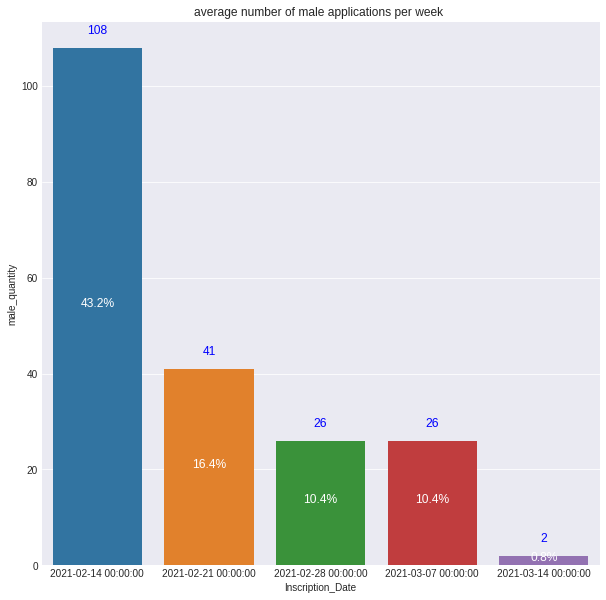

This graph allow us to see the weekly isncription variation of male


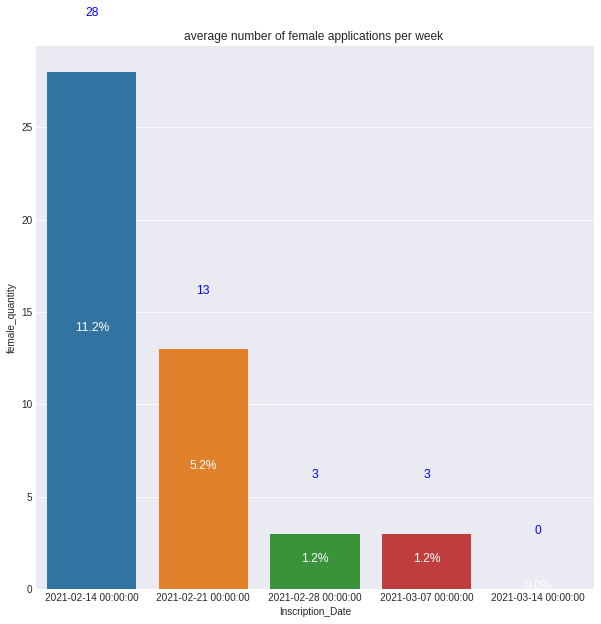

This graph allow us to see the female weekly inscription variation


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


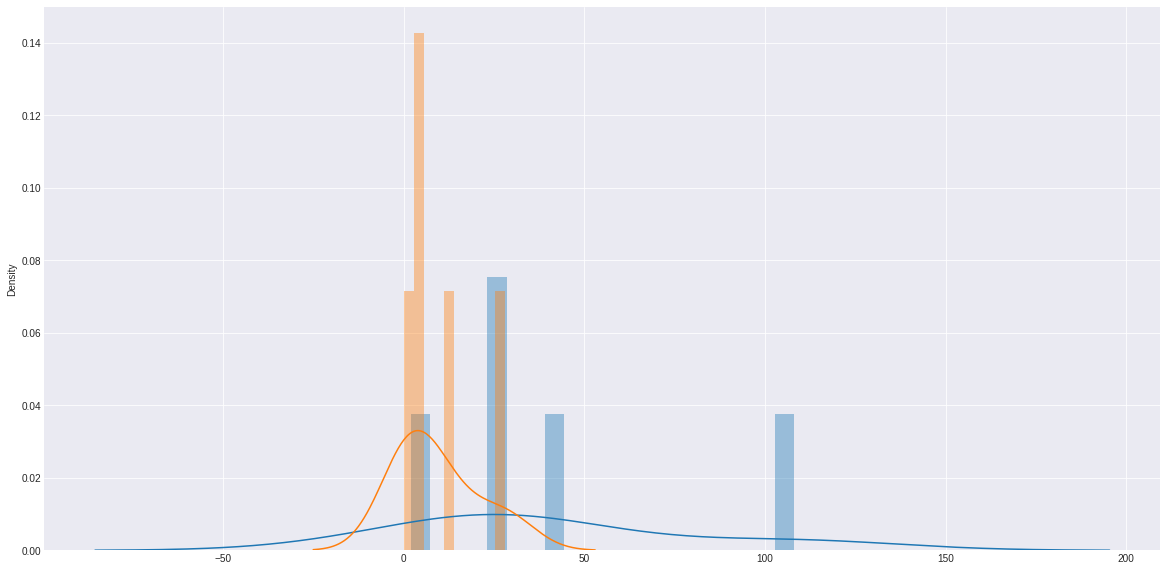

In [105]:
#Graphic representation for weekly inscription

registration_data.rename(columns={"male":"male_quantity", "female":"female_quantity"},inplace= True)
#print(pvt_computer)
Percent_registration_data.rename(columns={"male": "Percent_male","female":"Percent_female"}, inplace=True)

#print(Percent_internet_by_Commune)
Valid_registration_data= pd.concat([registration_data,Percent_registration_data],axis=1)
print(Valid_registration_data)


result11= generate_barchart(data=Valid_registration_data,title="average number of male applications per week ",abs_value="male_quantity",rel_value="Percent_male")
print("This graph allow us to see the weekly isncription variation of male")

result12= generate_barchart(data=Valid_registration_data,title="average number of female applications per week ",abs_value="female_quantity",rel_value="Percent_female")
print("This graph allow us to see the female weekly inscription variation")

#Allocate each gender values their own dataframe
male = registration_data.male_quantity 
female = registration_data.female_quantity 

# Histogram with rugplot and kde 
#He allow us to see the inscription dispertion by week and sex
plt.figure(figsize=(20,10))
sns.distplot(x=male,kde=True,bins=20)
sns.distplot(x=female,kde=True,bins=10)
plt.show()



### Second way to get the average application by week

Average application by week : 50.0


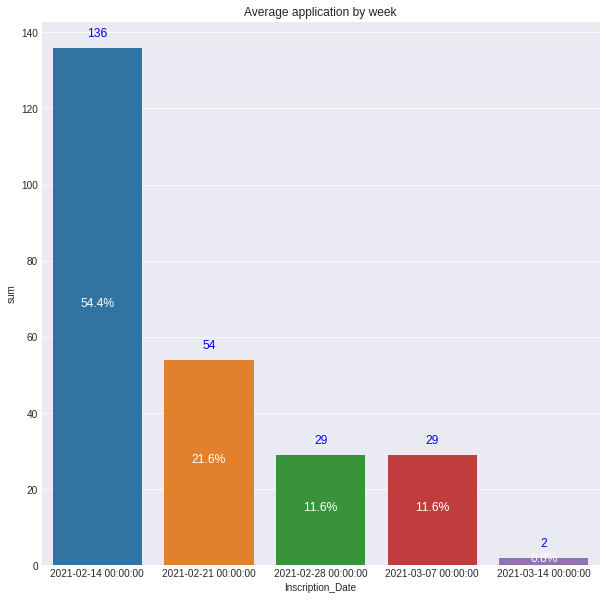

In [108]:
#Second way to result the average application by week


Valid_registration_data= pd.concat([registration_data,Percent_registration_data],axis=1)
Valid_registration_data['sum']=Valid_registration_data['male_quantity']+Valid_registration_data['female_quantity']
#Valid_registration_data.head()
Valid_registration_data['frequencies']=Valid_registration_data['sum']/result5.shape[0]
#Valid_registration_data.head()
Valid_registration_data_mean=(Valid_registration_data['sum'].sum())/Valid_registration_data.shape[0]
print("Average application by week :", Valid_registration_data_mean)
#Valid_registration_data.head()
graph12=generate_barchart(data=Valid_registration_data,title="Average application by week",abs_value="sum",rel_value="frequencies")

### How many weeks should we extend the application process to select 60 students per commune?

In [142]:
#How many weeks should we extend the application process to select 60 students per commune?

#Actual average applicants by week
#Total future selected
#Total future applicants
#If we have the same average application by week, found the extend delay


p=250 #ACtual quantity of applicants
w=5 #Actual number week
q=p/w #Actual average applicants by week
print("Actual average applicants by week :", q)


#Total future selected
r=60 #selected students by commune
s=3 #number commune
t=r*s #Total future selected
print("Total future selected :", t, "applicants")

#Total future applicants
u=20 #Actual applicant number
v=(p*t)/u #Total future applicants
print("Total future applicants :", v, "applicants")

#If we have the average application by week, found the extend delay
x=v/q #Total future week
#we considere we maintain the actuel 5 weeks inscriptions.
y=x-w #Extend delay

print("If we want to have 60 select students per commune , and if we have the same average applicaion by week ,the extend delay found will be : ", y, "weeks")

Actual average applicants by week : 50.0
Total future selected : 180 applicants
Total future applicants : 2250.0 applicants
If we want to have 60 select students per commune , and if we have the same average applicaion by week ,the extend delay found will be :  40.0 weeks


### What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection?

In [164]:
#What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection?

channel_women= pd.pivot_table(result5, values="quest_id",index="gender",columns="Communication_Channel",aggfunc="count")
channel_women

Communication_Channel,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,unknown
gender,,,,,,,,,,
female,4.0,8.0,5.0,6.0,11.0,1.0,1.0,9.0,2.0,NaN
male,11.0,6.0,13.0,34.0,56.0,4.0,14.0,57.0,7.0,1.0


As we can see the three most effective channel who will allow  a women to be susceptible to selection are : Friends , Whatssap , Bootcamp Alumni. 


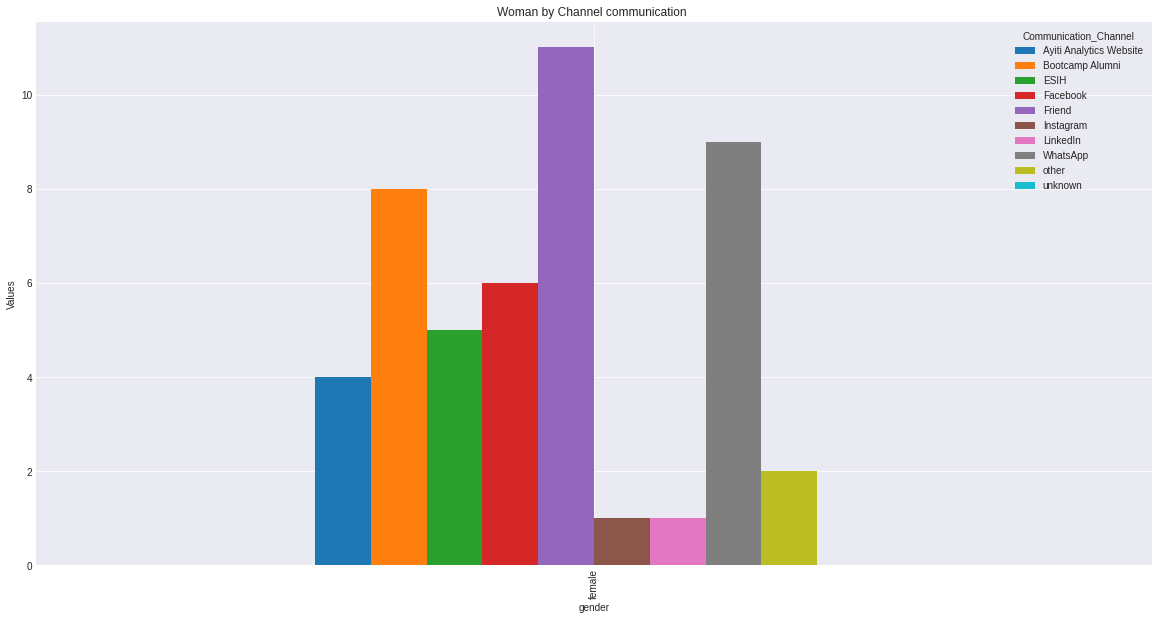

In [165]:

channel_women.drop(["male"], axis="index", inplace=True)

#generate_barchart(data=gender_result,title="Total et Percent By Sex",abs_value="Total",rel_value="Percent")
fig_1= channel_women.plot(kind="bar")
# Get a Matplotlib figure from the axes object to format purposes
fig =fig_1.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(20,10)
# Set the axes labels
fig_1.set_xlabel("gender")
fig_1.set_ylabel("Values")
fig_1.set_title("Woman by Channel communication ")
fig_1
print("As we can see the three most effective channel who will allow  a women to be susceptible to selection are : Friends , Whatssap , Bootcamp Alumni. ")